## Starting with Geopandas & Rasterio


In [1]:
#%pip install rasterio

In [2]:
#%pip install geopandas

In [12]:
import rasterio
import pandas as pd
import numpy as np

# Open the raster file (GeoTIFF format or any other raster file)
in_img = r"C:\Users\mun93\Downloads\DEU_power-density_100m.tif"

ds = rasterio.open(in_img)
data = ds.read()
data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 3457, 4674), dtype=float32)

In [14]:
print(np.isnan(data).sum())
print(data.size)
print(data.shape)


7610597
16158018
(1, 3457, 4674)


In [15]:
ds.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4674, 'height': 3457, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 3.349072682193763,
       0.0, -0.002500000000000124, 55.91826874773593), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [16]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 4674,
 'height': 3457,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.002500000000000124, 0.0, 3.349072682193763,
        0.0, -0.002500000000000124, 55.91826874773593)}

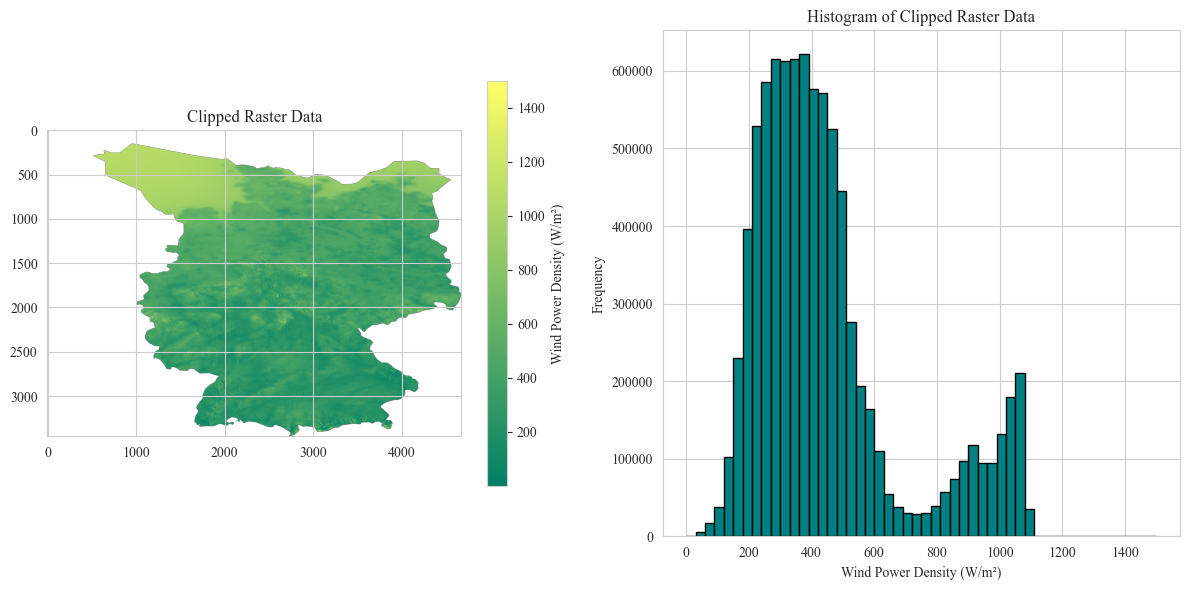

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from matplotlib import cm

# Open the raster file (GeoTIFF format or any other raster file)
raster_file = in_img  # Make sure 'in_img' is defined (file path)

# Open the raster with rasterio
with rasterio.open(raster_file) as ds:
    # Read the raster data into a numpy array (2D array of pixel values)
    raster_data = ds.read(1)  # Read the first band (assuming single-band raster)

    # Ensure the data is in float32 (already given as 'float32')
    raster_data = raster_data.astype(np.float32)

    # Clip the raster data, setting the maximum value to 1200
    clipped_raster_data = np.clip(raster_data, None, 1500)  # None for the min value, 1200 for the max value

    # Create a figure with two subplots (one for the raster image, one for the histogram)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot the clipped raster data (second subplot)
    cax = ax[0].imshow(clipped_raster_data, cmap='summer')  # Display image using imshow
    ax[0].set_title('Clipped Raster Data')  # Title for the image plot
    ax[0].axis('on')  # Hide the axis for better aesthetics


    # Add colorbar (legend) to the raster plot
    cbar = fig.colorbar(cax, ax=ax[0], shrink=0.8)  # Add colorbar to the figure
    cbar.set_label('Wind Power Density (W/m²)')  # Label for the colorbar

    # Plot the histogram of the clipped data (first subplot)
    ax[1].hist(clipped_raster_data.flatten(), bins=50, color='teal', edgecolor='black')  # Flatten to 1D
    ax[1].set_title('Histogram of Clipped Raster Data')  # Title for the histogram plot
    ax[1].set_xlabel('Wind Power Density (W/m²)')
    ax[1].set_ylabel('Frequency')

    # Display the plots
    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()


## Clipping the power density ratser to DE

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4674, 'height': 3457, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 3.349072682193763,
       0.0, -0.002500000000000124, 55.91826874773593)}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 3659, 'height': 3081, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0025000

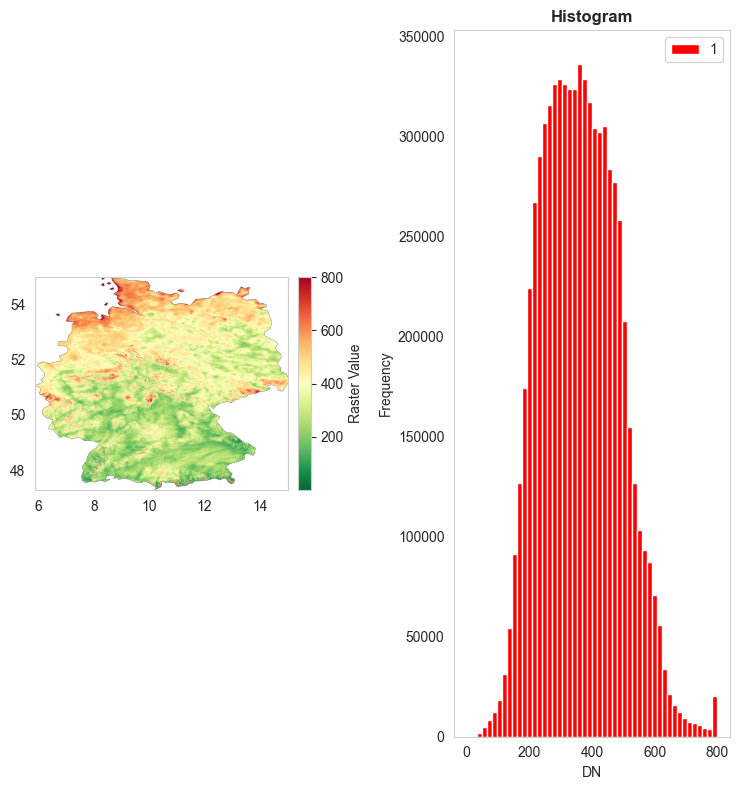

In [6]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd

# Define paths
shapefile_path = r"C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp"
raster_file = r"C:\Users\mun93\Downloads\DEU_power-density_100m.tif"
output_raster = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped1.tif"  # Output file path

# Load shapefile and filter for Germany (NUTS level 0)
gdf = gpd.read_file(shapefile_path)
DE_clipped = gdf[(gdf.CNTR_CODE == "DE") & (gdf.LEVL_CODE == 0)]

# Clip the raster
with rasterio.open(raster_file) as src:
    if DE_clipped.crs != src.crs:
        DE_clipped = DE_clipped.to_crs(src.crs)

    DE_raster_clipped, transform = mask(src, DE_clipped.geometry, crop=True)
    print(src.meta)

    # Copy metadata from source raster
    meta = src.meta.copy()

    # Update metadata with new transform, dimensions, and compression
    meta.update({
        "driver": "GTiff",
        "height": DE_raster_clipped.shape[1],
        "width": DE_raster_clipped.shape[2],
        "transform": transform,
       # "compress": "lzw"  # Optional: reduces file size
    })

# Save the clipped raster
with rasterio.open(output_raster, "w", **meta) as dst:
    dst.write(DE_raster_clipped)
    print(dst.meta)

print(f"Clipped raster saved to: {output_raster}")

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(7.5, 8))
max_value_to_show = 800
# Show raster image
image = show(np.clip(DE_raster_clipped, None, max_value_to_show), transform=transform, cmap="RdYlGn_r", ax=ax[0])
ax[0].grid(False)

# Create a separate axis for the colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[0])  # Attach to first plot only
cax = divider.append_axes("right", size="5%", pad=0.1)  # Position for colorbar

# Add colorbar properly
cbar = plt.colorbar(image.get_images()[0], cax=cax)
cbar.set_label("Raster Value")

# Show histogram
show_hist(np.clip(DE_raster_clipped, None, max_value_to_show), bins=50, ax=ax[1])
ax[1].grid(False)

plt.tight_layout()
plt.show()

In [208]:
clp = rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped1.tif")
clp_data = clp.read(1)
print(np.isnan(clp_data).sum())
print((np.isnan(clp_data).sum())/clp_data.size)

3966686
0.35186309268942345


In [3]:
#%pip install cartopy

<module 'matplotlib.pyplot' from 'C:\\Users\\mun93\\anaconda3\\envs\\JupyterProject_3.10\\lib\\site-packages\\matplotlib\\pyplot.py'>

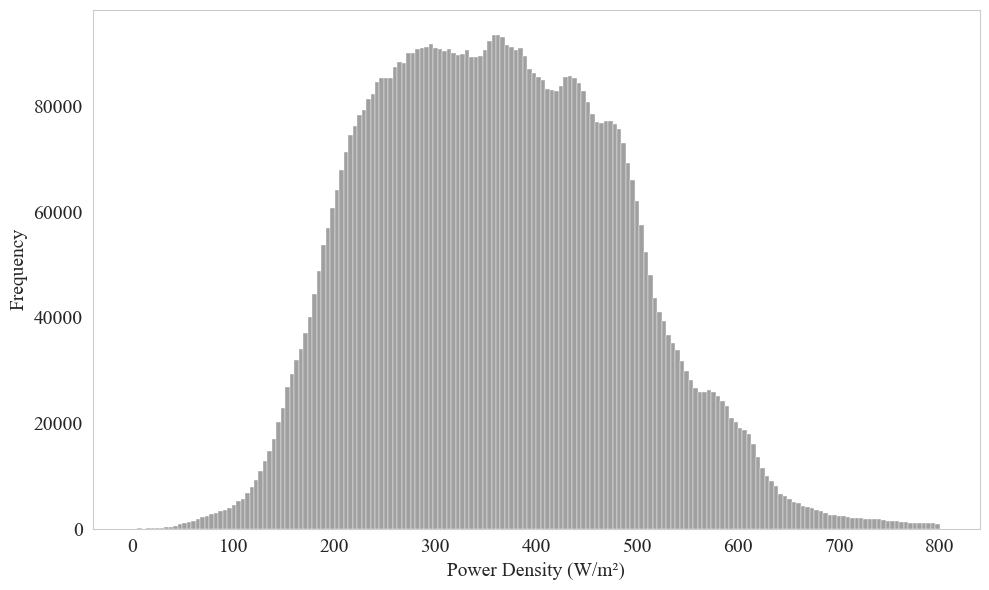

In [17]:
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
# Open the raster
with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped1.tif") as clp:
    data = clp.read(1)  # Read first band
    nodata = clp.nodata

# Mask nodata values
data = np.ma.masked_equal(data, nodata).compressed()  # Flatten and remove masked (nodata) values

# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
filtered_data = data[(data >= 0) & (data <= 800)]

sns.histplot(filtered_data, bins=180, kde=False, color='grey')

#plt.title('Distribution of Wind Power Density in Germany')
plt.xlabel('Power Density (W/m²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(False)
plt.tight_layout()
plt


## For the report

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


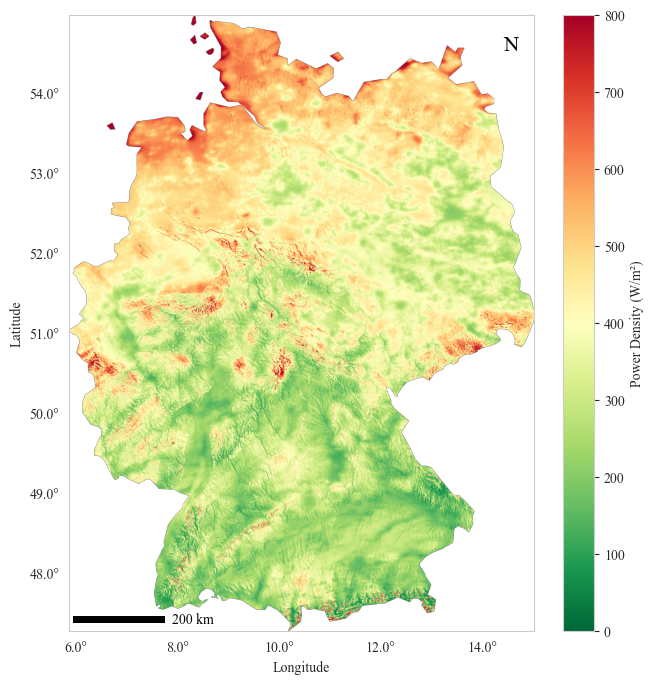

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Open the raster
with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif") as src:
    raster = src.read(1)
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
    nodata = src.nodata

# Step 1: Mask the nodata values
masked_raster = np.ma.masked_equal(raster, nodata)

# Step 2: Plot with transparent background and extras
fig, ax = plt.subplots(figsize=(7.5, 8))

# Show raster
img = ax.imshow(masked_raster, vmin=0, vmax=800, cmap='RdYlGn_r', extent=extent)
cbar = fig.colorbar(img, ax=ax, label='Power Density (W/m²)')
scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='right'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)


# Axes and layout
ax.set_xlabel("Longitude")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))

ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=15, ha='center', va='center', color='black')


ax.set_ylabel("Latitude")
ax.set_aspect('auto')
plt.grid(False)
#plt.tight_layout()
plt.show()


EPSG:4326
Pixel Size: 0.002500000000000124 × 0.002500000000000124 meters
Pixel Area: 6.25000000000062e-06 m²
Array shape: (3457, 4674)


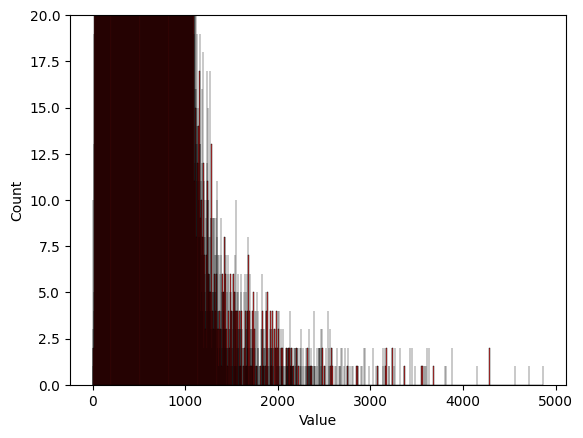

In [33]:
import seaborn as sns
import rasterio
import numpy as np

# Open raster file
with rasterio.open(r"C:\Users\mun93\Downloads\DEU_power-density_100m.tif") as src:
    dn_array = src.read(1)  # Read the first band into an array
    pixel_size_x, pixel_size_y = src.res
    print(src.crs)
    pixel_area = pixel_size_x * pixel_size_y
    print(f"Pixel Size: {pixel_size_x} × {pixel_size_y} meters")
    print(f"Pixel Area: {pixel_area} m²")

# Print shape and sample values
print("Array shape:", dn_array.shape)  # (Height, Width)
Samplevalues = dn_array
Samplevalues = Samplevalues[~np.isnan(dn_array)]
filt = pd.DataFrame(Samplevalues, columns=["Value"])
#filt.head()
sns.histplot(data=filt, x='Value', linewidth=.3, color="r")
plt.ylim(0, 20)
plt.show()



In [20]:
import geopandas as gpd
shfl = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'

gdf = gpd.read_file(shfl)
gdf.head(4)

NUTS_ID  LEVL_CODE CNTR_CODE NAME_LATN NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
0   AL011          3        AL     Dibër     Dibër         NaN        NaN   
1   AL012          3        AL    Durrës    Durrës         NaN        NaN   
2   AL013          3        AL     Kukës     Kukës         NaN        NaN   
3   AL014          3        AL     Lezhë     Lezhë         NaN        NaN   

   COAST_TYPE                                           geometry  
0         NaN  POLYGON ((20.2208 41.86937, 20.56287 41.84614,...  
1         NaN  POLYGON ((19.55733 41.57767, 19.83218 41.56823...  
2         NaN  POLYGON ((20.59429 41.87733, 20.56287 41.84614...  
3         NaN  POLYGON ((19.52007 41.84031, 19.48726 41.9043,...

In [21]:
gdf.CNTR_CODE.unique()


array(['AL', 'AT', 'BE', 'SI', 'SK', 'IT', 'CY', 'CZ', 'DE', 'TR', 'LI',
       'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'UA', 'XK', 'BA', 'NO',
       'DK', 'EE', 'EL', 'PL', 'ES', 'BG', 'CH', 'PT', 'FI', 'RO', 'RS',
       'SE', 'FR', 'HR', 'HU', 'IE', 'IS'], dtype=object)

In [22]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

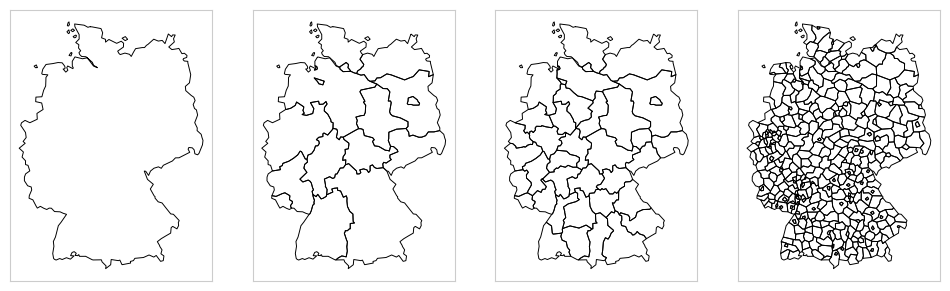

In [23]:
figure, ax = plt.subplots(1, len(gdf.LEVL_CODE.unique()), figsize=(12, 6))
for i in gdf.LEVL_CODE.unique():
    DE_gdf = gdf[(gdf.CNTR_CODE == 'DE') & (gdf.LEVL_CODE== i)]
    DE_gdf.plot('NUTS_NAME', ax=ax[i], edgecolor='black', facecolor='none', linewidth=.7, label='NUTS_NAME')
    ax[i].set_xticks([])
    ax[i].set_yticks([])  # Removes x-axis ticks# Removes x-axis ticks  # Hides x-axis labels and ticks



In [24]:
print(gdf.crs)
# Calculate area in square kilometers
de_boundries = gdf[(gdf.CNTR_CODE == 'DE') & (gdf.LEVL_CODE== 2)]
de_boundries
#de_boundries = de_boundries.to_crs(epsg=3035)

de_boundries["area_km2"] = de_boundries.geometry.area/1E6
#print(de_boundries[["NUTS_NAME", "area_km2"]])  # Displays the area
print(de_boundries[["area_km2"]].sum())
de_boundries.head()




EPSG:4326
area_km2    0.000046
dtype: float64


C:\Users\mun93\AppData\Local\Temp\ipykernel_23984\1432141915.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  de_boundries["area_km2"] = de_boundries.geometry.area/1E6
C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


NUTS_ID  LEVL_CODE CNTR_CODE   NAME_LATN   NUTS_NAME  MOUNT_TYPE  \
918    DE11          2        DE   Stuttgart   Stuttgart         NaN   
919    DE12          2        DE   Karlsruhe   Karlsruhe         NaN   
920    DE13          2        DE    Freiburg    Freiburg         NaN   
921    DE14          2        DE    Tübingen    Tübingen         NaN   
922    DE21          2        DE  Oberbayern  Oberbayern         NaN   

     URBN_TYPE  COAST_TYPE                                           geometry  \
918        NaN         NaN  POLYGON ((9.79842 49.69492, 9.93554 49.5007, 1...   
919        NaN         NaN  POLYGON ((9.51528 49.47577, 9.60382 49.42658, ...   
920        NaN         NaN  POLYGON ((8.25952 48.38014, 8.30399 48.34909, ...   
921        NaN         NaN  POLYGON ((9.94407 48.63176, 10.23078 48.51051,...   
922        NaN         NaN  POLYGON ((11.51417 49.0465, 11.59931 48.9515, ...   

         area_km2  
918  1.283743e-06  
919  8.393408e-07  
920  1.128076e-06  
921  1.135075e-06  
922  2.106260e-06

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


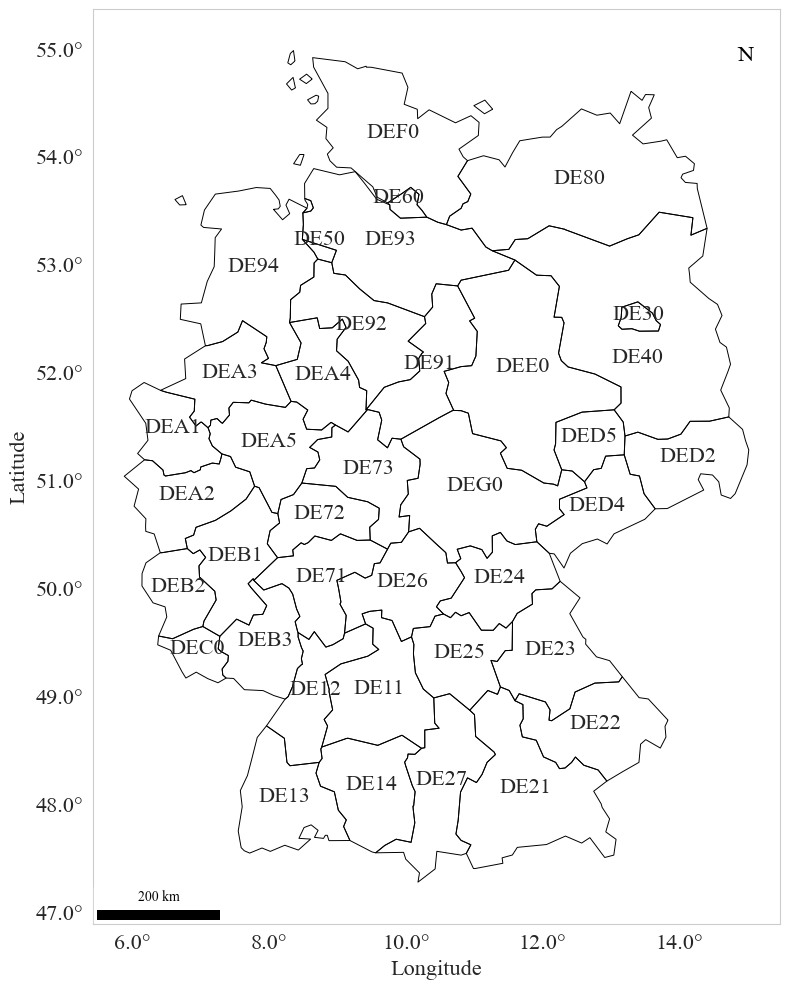

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import geopandas as gpd
from rasterio.mask import mask


# Set the font to Times New Roman globally
plt.rcParams['font.family'] = 'Times New Roman'

# Step 1: Plot with transparent background and extras
fig, ax = plt.subplots(figsize=(8, 10))

DE_gdf_nuts2 = gdf[(gdf.CNTR_CODE == 'DE') & (gdf.LEVL_CODE== 2)]
DE_gdf_nuts2.plot('NUTS_NAME', edgecolor='black', facecolor='none', linewidth=.7, label='NUTS_NAME', ax=ax)

# Add annotations
for i, row in DE_gdf_nuts2.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=row['NUTS_ID'],
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=16,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points'
    )


# Add a scale bar
scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top')
ax.add_artist(scalebar)

# Axes and layout
ax.set_xlabel("Longitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=16, ha='center', va='center', color='black')

ax.set_ylabel("Latitude", fontsize=16)
ax.set_aspect('auto')
plt.grid(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid(False)
plt.show()


## clip the PD to NUTS2

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


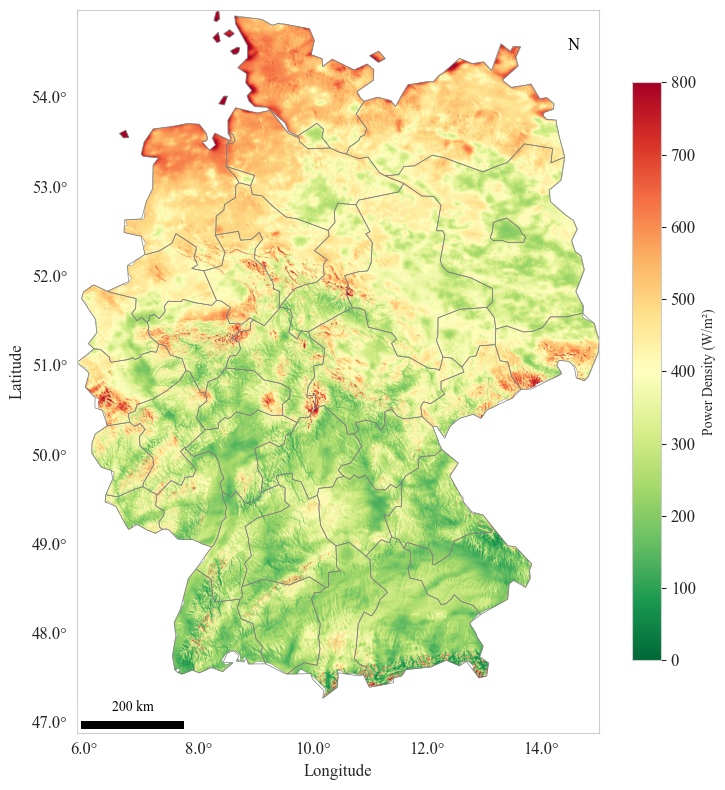

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import geopandas as gpd
from rasterio.mask import mask

# Set the font to Times New Roman globally
plt.rcParams['font.family'] = 'Times New Roman'

# Load the NUTS2 boundaries shapefile (replace with your actual file path)
de_boundaries = de_boundries.copy()

# Open the raster
with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif") as src:
    raster = src.read(1)
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
    nodata = src.nodata

    # Reproject the NUTS2 shapefile to match the raster CRS
    de_boundaries = de_boundaries.to_crs(src.crs)

    # Mask the raster using the NUTS2 boundary (clip the raster)
    geometries = de_boundaries.geometry
    out_image, out_transform = mask(src, geometries, crop=True)

    # Mask the NoData values
    out_image = np.ma.masked_equal(out_image, nodata)

# Step 1: Plot with transparent background and extras
fig, ax = plt.subplots(figsize=(7.5, 8))

# Show the clipped raster
img = ax.imshow(out_image[0], vmin=0, vmax=800, cmap='RdYlGn_r', extent=extent)
cbar = fig.colorbar(img, ax=ax, label='Power Density (W/m²)', shrink=0.8)
cbar.ax.tick_params(labelsize=12)

# Add a scale bar
scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top')
ax.add_artist(scalebar)

# Plot NUTS2 boundaries on top of the raster
de_boundaries.boundary.plot(ax=ax, color='grey', linewidth=0.5)

# Axes and layout
ax.set_xlabel("Longitude", fontsize=12)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))

# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, ha='center', va='center', color='black')

ax.set_ylabel("Latitude", fontsize=12)
ax.set_aspect('auto')
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## zonal statistics

In [168]:
import numpy as np
import rasterio
import geopandas as gpd
from rasterio.mask import mask
import pandas as pd

# Load the NUTS2 boundaries shapefile (replace with the actual file path)
de_boundaries = de_boundries.copy()

# Open the raster
with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif") as src:
    raster = src.read(1)  # Read the first band (assuming it's a single-band raster)
    nodata = src.nodata  # Get the NoData value
    crs_raster = src.crs  # Get the raster CRS

    # Check if the CRS of the shapefile and the raster match
    if de_boundaries.crs != crs_raster:
        print("CRS mismatch! Reprojecting NUTS2 boundaries to match raster CRS...")
        de_boundaries = de_boundaries.to_crs(crs_raster)  # Reproject to match raster CRS

    # Create a list to store the statistics
    zonal_stats = []

    # Iterate over each NUTS2 region
    for idx, region in de_boundaries.iterrows():
        # Get the geometry of the region (NUTS2 boundary)
        region_geometry = [region['geometry']]

        # Mask the raster with the current region geometry
        out_image, out_transform = mask(src, region_geometry, crop=True)

        # Handle NoData (replace with NaN)
        out_image = np.where(out_image == nodata, np.nan, out_image)  # Replace NoData values with NaN

        # Flatten the raster to simplify calculations and exclude NaN values
        data_values = out_image.flatten()

        # Remove NaN values from the data (use np.isnan to mask NaNs)
        data_values = data_values[~np.isnan(data_values)]

        # Check if there are valid data points
        if len(data_values) > 0:
            # Calculate statistics
            region_stats = {
                'NUTS2 Region': region['NUTS_ID'],  # or the correct NUTS2 ID column
                'mean': np.mean(data_values),
                'sum': np.sum(data_values),
                'min': np.min(data_values),
                'max': np.max(data_values),
                'std': np.std(data_values)
            }
            zonal_stats.append(region_stats)
        else:
            print(f"Region {region['NUTS_ID']} has no valid raster data.")

    # Create a DataFrame to store the statistics
    stats_df = pd.DataFrame(zonal_stats)

# Display the DataFrame
stats_df



NUTS2 Region        mean          sum         min          max         std
0          DE11  278.943085   57296024.0   74.912666  1323.655640   84.805283
1          DE12  279.286499   37397300.0   28.488640  1389.942871   83.871292
2          DE13  232.801163   41040052.0   23.430351  1261.817505   97.964104
3          DE14  261.311707   47138540.0   68.244316   908.088623   73.744743
4          DE21  249.920776   83674976.0    0.509222  4867.437012  124.339935
5          DE22  214.938202   42299408.0   39.762573   789.294434   65.417221
6          DE23  241.164276   46180548.0   77.132881   962.759155   69.573380
7          DE24  282.484497   41689064.0   77.617432   821.280884   79.634155
8          DE25  288.945374   41454124.0  111.921043   690.724976   76.387680
9          DE26  260.132477   44096356.0   50.789509  1148.377563   80.167732
10         DE27  281.534821   54284980.0   23.148733  2482.542725   97.193893
11         DE30  251.943680    4652140.0  185.568298   420.997101   42.379738
12         DE40  354.371368  220719504.0  190.077850   615.031189   64.147064
13         DE50  459.170532    3988814.5  303.146027   751.123291   82.053116
14         DE60  406.651123    6708523.5  232.404526   923.060669  164.715897
15         DE71  259.893860   39199792.0   44.608147   791.244690   83.248856
16         DE72  301.675873   32806948.0   95.105888   983.830261  102.738800
17         DE73  333.155731   56586500.0  105.442589  1262.249023  110.332230
18         DE80  474.030273  238149488.0  246.567673   842.966736   71.107727
19         DE91  378.557892   64349540.0   79.369568  1159.365356   95.424461
20         DE92  448.262329   87450152.0  167.487686  1292.908447   74.585762
21         DE93  448.809692  148313648.0  226.966644   801.948730   89.355949
22         DE94  517.674377  162558032.0  296.664856   926.071472   76.966431
23         DEA1  391.658508   42320660.0  145.577393   776.804810   73.631569
24         DEA2  400.296234   60436724.0  139.888397  1213.114136  119.445503
25         DEA3  431.605652   62777904.0  207.638031   749.465088   59.038555
26         DEA4  425.972534   57750376.0  175.459274  1026.446777   85.252472
27         DEA5  395.657990   65156956.0   75.983459  1277.007568  121.227516
28         DEB1  341.038422   55920412.0   48.741840   872.696350   97.901245
29         DEB2  357.536743   34001028.0   71.462944   896.048706   98.125305
30         DEB3  289.007629   39683928.0   52.982830  1012.015564   87.213745
31         DEC0  303.495575   14976292.0   69.087982   745.332336   79.693359
32         DED2  414.603485   66978364.0   80.826797  1263.157349  112.803459
33         DED4  400.524902   53357128.0  101.312721  1267.167603   92.412361
34         DED5  365.701508   28675022.0  216.631165   608.320618   43.937180
35         DEE0  380.491272  165523600.0   99.900719  1678.993530   64.450729
36         DEF0  554.864746  188701168.0  282.424957   995.745728   84.674248
37         DEG0  349.579285  114525672.0   59.785397  1351.652832  101.279198

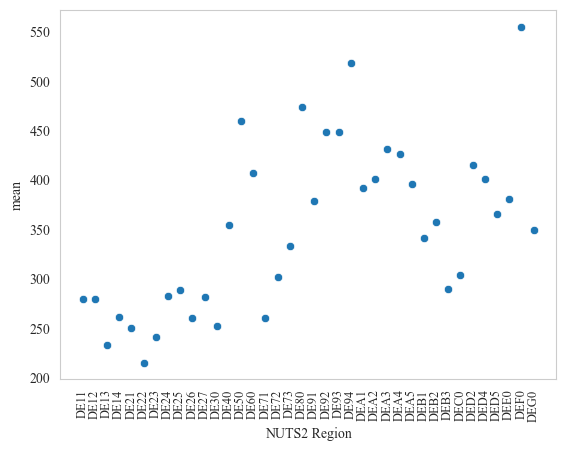

In [164]:
import seaborn as sns
sns.scatterplot(x="NUTS2 Region", y="mean", data=stats_df, legend=False)
plt.xticks(rotation=90, fontsize=9)
plt.grid(False)


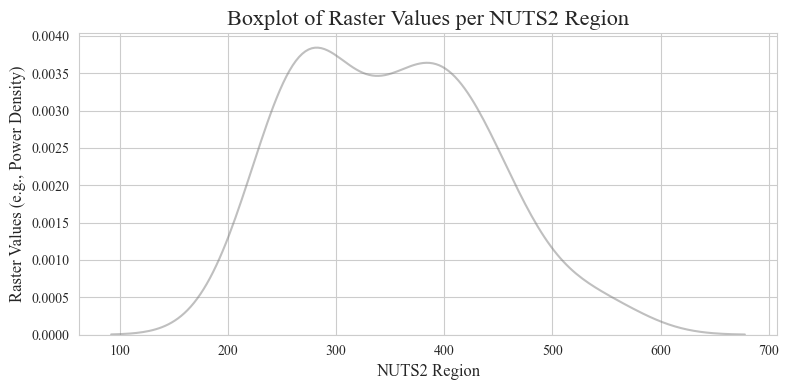

In [173]:
import numpy as np
import rasterio
import geopandas as gpd
from rasterio.mask import mask
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 4))
#sns.boxplot(x='mean', y='Values', data=stats_df.mean, palette='Set2', whis=1.5)
sns.kdeplot(data = stats_df, x= 'mean', color='grey', alpha=0.5)

# Add labels and title
plt.title('Boxplot of Raster Values per NUTS2 Region', fontsize=16)
plt.xlabel('NUTS2 Region', fontsize=12)
plt.ylabel('Raster Values (e.g., Power Density)', fontsize=12)
#plt.xticks(rotation=90)  # Rotate region labels for readability
plt.tight_layout()


# Show the plot
plt.show()


C:\Users\mun93\AppData\Local\Temp\ipykernel_28280\206232385.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Values', data=df.explode('Values'), palette='Set2', whis=1.5)


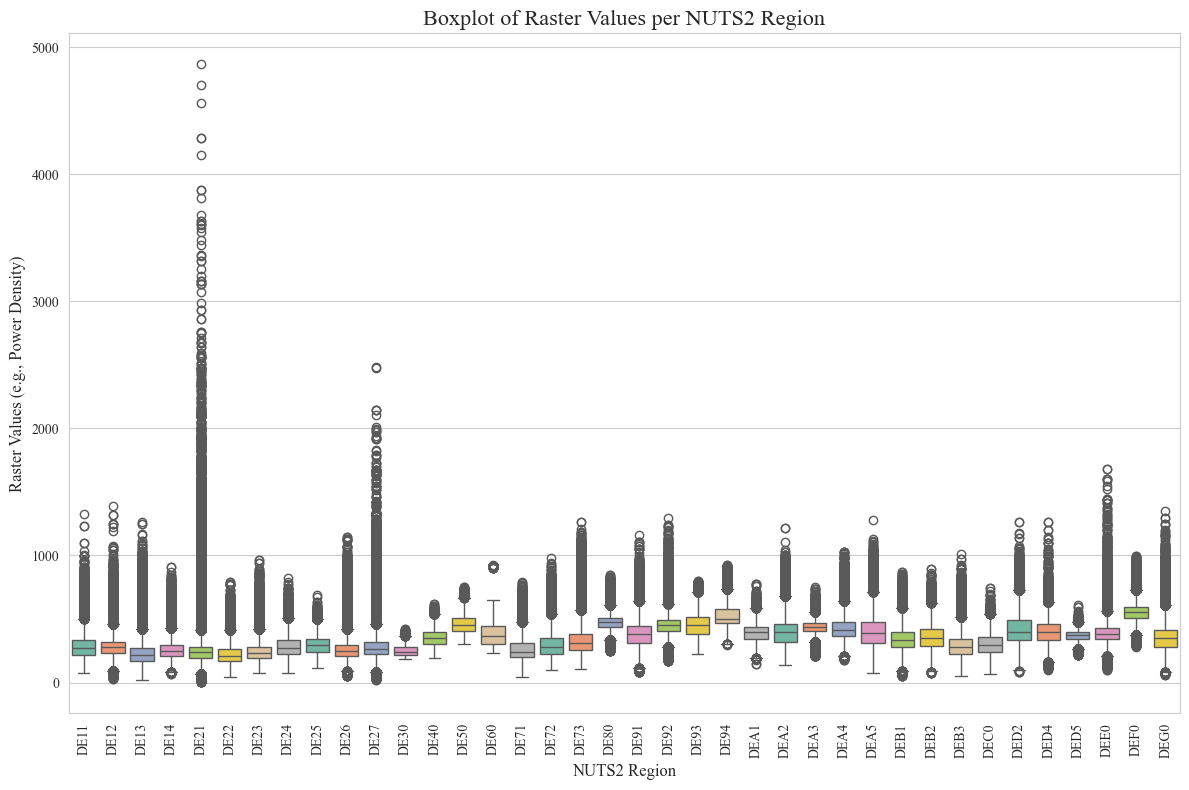

In [136]:
import numpy as np
import rasterio
import geopandas as gpd
from rasterio.mask import mask
import seaborn as sns
import matplotlib.pyplot as plt

# Load the NUTS2 boundaries shapefile (replace with the actual file path)
de_boundaries = de_boundries.copy()

# Open the raster
with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif") as src:
    raster = src.read(1)  # Read the first band (assuming it's a single-band raster)
    nodata = src.nodata  # Get the NoData value
    crs_raster = src.crs  # Get the raster CRS

    # Check if the CRS of the shapefile and the raster match
    if de_boundaries.crs != crs_raster:
        print("CRS mismatch! Reprojecting NUTS2 boundaries to match raster CRS...")
        de_boundaries = de_boundaries.to_crs(crs_raster)  # Reproject to match raster CRS

    # Create a list to collect raster values for each NUTS2 region
    region_values = []

    # Iterate over each NUTS2 region
    for idx, region in de_boundaries.iterrows():
        # Get the geometry of the region (NUTS2 boundary)
        region_geometry = [region['geometry']]

        # Mask the raster with the current region geometry
        out_image, out_transform = mask(src, region_geometry, crop=True)

        # Handle NoData (replace with NaN)
        out_image = np.where(out_image == nodata, np.nan, out_image)  # Replace NoData values with NaN

        # Flatten the raster to simplify calculations and exclude NaN values
        data_values = out_image.flatten()


        # Remove NaN values from the data (use np.isnan to mask NaNs)
        data_values = data_values[(~np.isnan(data_values)) | (data_values < 800)]


        # Check if there are valid data points
        if len(data_values) > 0:
            # Append the valid raster values and the region name
            region_values.append({'Region': region['NUTS_ID'], 'Values': data_values})
        else:
            print(f"Region {region['NUTS_ID']} has no valid raster data.")

# Now create a DataFrame with the region and its corresponding raster values
import pandas as pd

# Expand the region_values list into a DataFrame for easier plotting
df = pd.DataFrame(region_values)

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Values', data=df.explode('Values'), palette='Set2', whis=1.5)

# Add labels and title
plt.title('Boxplot of Raster Values per NUTS2 Region', fontsize=16)
plt.xlabel('NUTS2 Region', fontsize=12)
plt.ylabel('Raster Values (e.g., Power Density)', fontsize=12)
plt.xticks(rotation=90)  # Rotate region labels for readability
plt.tight_layout()


# Show the plot
plt.show()


## The Land Cover Raster

In [122]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

scale_factor = 20  # Reduce resolution by 4x
with rasterio.open(r"C:\Users\mun93\Downloads\Land_Cover_Esri_2024\34T_20240101-20241231.tif") as src:
    print(src.profile)
    print(src.crs)
    new_shape = (src.height // scale_factor, src.width // scale_factor)
    band_resampled = src.read(
        1,
        out_shape=new_shape,
        resampling=Resampling.average
    )
#src.meta
print(f"Scaled raster size: {band_resampled.shape}")  # Output (height, width)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 51218, 'height': 89289, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]'), 'transform': Affine(10.0, 0.0, 243910.0,
       0.0, -10.0, 5320650.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
EPSG:32634
Scaled raster size: (4464, 2560)


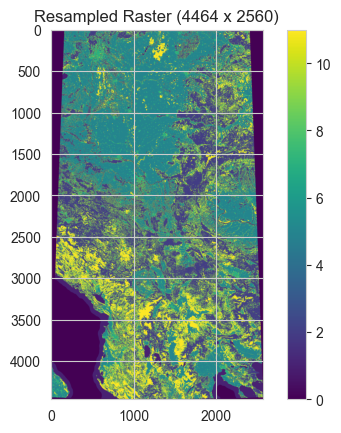

In [39]:
import matplotlib.pyplot as plt

plt.imshow(band_resampled, cmap="viridis")
plt.title(f"Resampled Raster ({new_shape[0]} x {new_shape[1]})")
plt.colorbar()
plt.show()

In [31]:
import os
import rasterio
from rasterio.enums import Resampling

# Input and output directories
input_dir = r"C:\Users\mun93\Downloads\Land_Cover_Esri_2024"
output_dir = r"C:\Users\mun93\Downloads\Downsized_tif2"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Downscaling factor (e.g., 20x reduction)
scale_factor = 10

# Loop through all TIFF files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, f"downsized_{filename}")

        with rasterio.open(input_path) as src:
            # Calculate new dimensions
            new_height = src.height // scale_factor
            new_width = src.width // scale_factor

            # Resample the data (using 'average' for continuous data, 'mode' for categorical)
            data = src.read(
                1,
                out_shape=(new_height, new_width),
                resampling=Resampling.mode   # Use `Resampling.mode` if land cover is categorical
            )

            # Update metadata for the new file
            meta = src.meta.copy()
            meta.update({
                'height': new_height,
                'width': new_width,
                'transform': src.transform * src.transform.scale(scale_factor)
            })

            # Write the downsampled raster
            with rasterio.open(output_path, 'w', **meta) as dst:
                dst.write(data, 1)
            dst.close()

        print(f"Downsampled {filename} → {output_path}")

print("All files processed!")

Downsampled 31T_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_31T_20240101-20241231.tif
Downsampled 31U_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_31U_20240101-20241231.tif
Downsampled 32T_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_32T_20240101-20241231.tif
Downsampled 32U_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_32U_20240101-20241231.tif
Downsampled 32V_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_32V_20240101-20241231.tif
Downsampled 33T_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_33T_20240101-20241231.tif
Downsampled 33U_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_33U_20240101-20241231.tif
Downsampled 33V_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsized_tif2\downsized_33V_20240101-20241231.tif
Downsampled 34T_20240101-20241231.tif → C:\Users\mun93\Downloads\Downsiz

In [32]:
import rasterio

input_dir = r"C:\Users\mun93\Downloads\Downsized_tif2"
tif_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.tif')]

# Print CRS of each file
for file in tif_files:
    with rasterio.open(file) as src:
        print(f"{os.path.basename(file)}: CRS = {src.crs}")

from rasterio.warp import calculate_default_transform, reproject, Resampling

def reproject_tif(input_path, output_path, dst_crs='EPSG:4326'):
    with rasterio.open(input_path) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        meta = src.meta.copy()
        meta.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rasterio.open(output_path, 'w', **meta) as dst:
            reproject(
                source=rasterio.band(src, 1),
                destination=rasterio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)  # Use 'nearest' for categorical data

# Reproject all files to EPSG:4326
output_dir_reprojected = os.path.join(input_dir, "Reprojected")
os.makedirs(output_dir_reprojected, exist_ok=True)

for file in tif_files:
    output_path = os.path.join(output_dir_reprojected, f"reprojected_{os.path.basename(file)}")
    reproject_tif(file, output_path)
    print(f"Reprojected {os.path.basename(file)} → {output_path}")

DE_landcover_aligned_to_PD.tif: CRS = EPSG:4326
DE_landcover_aligned_to_PD_for_testing_buffer.tif: CRS = EPSG:3035
DE_landcover_clipped.tif: CRS = EPSG:4326
downsized_31T_20240101-20241231.tif: CRS = EPSG:32631
downsized_31U_20240101-20241231.tif: CRS = EPSG:32631
downsized_32T_20240101-20241231.tif: CRS = EPSG:32632
downsized_32U_20240101-20241231.tif: CRS = EPSG:32632
downsized_32V_20240101-20241231.tif: CRS = EPSG:32632
downsized_33T_20240101-20241231.tif: CRS = EPSG:32633
downsized_33U_20240101-20241231.tif: CRS = EPSG:32633
downsized_33V_20240101-20241231.tif: CRS = EPSG:32633
downsized_34T_20240101-20241231.tif: CRS = EPSG:32634
downsized_34U_20240101-20241231.tif: CRS = EPSG:32634
downsized_34V_20240101-20241231.tif: CRS = EPSG:32634
merged_mosaic.tif: CRS = EPSG:4326
Reprojected DE_landcover_aligned_to_PD.tif → C:\Users\mun93\Downloads\Downsized_tif2\Reprojected\reprojected_DE_landcover_aligned_to_PD.tif
Reprojected DE_landcover_aligned_to_PD_for_testing_buffer.tif → C:\Users\m

In [33]:
from rasterio.merge import merge
import os
# List reprojected files
reprojected_files = [os.path.join(output_dir_reprojected, f) for f in os.listdir(output_dir_reprojected) if f.endswith('.tif')]
src_files = [rasterio.open(f) for f in reprojected_files]

# Merge
mosaic, out_trans = merge(src_files)
meta = src_files[0].meta.copy()
meta.update({
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})

# Save merged mosaic
output_mosaic_path = os.path.join(input_dir, "merged_mosaic.tif")
with rasterio.open(output_mosaic_path, "w", **meta) as dst:
    dst.write(mosaic)

for src in src_files:
    src.close()

print(f"Merged mosaic saved to: {output_mosaic_path}")

Merged mosaic saved to: C:\Users\mun93\Downloads\Downsized_tif2\merged_mosaic.tif


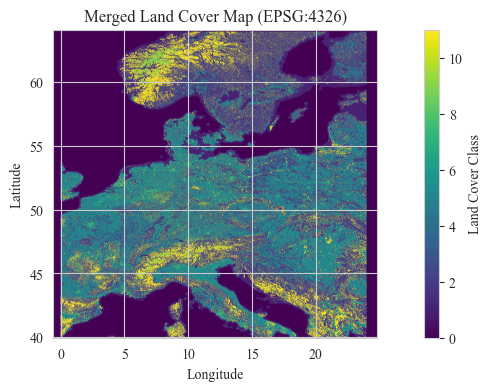

In [34]:
import matplotlib.pyplot as plt

with rasterio.open(output_mosaic_path) as src:
    data = src.read(1)
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

plt.figure(figsize=(12, 4))
plt.imshow(data, extent=extent, cmap='viridis')  # Adjust colormap for land cover
plt.colorbar(label='Land Cover Class')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Merged Land Cover Map (EPSG:4326)")
plt.show()

EPSG:4326
Clipped raster saved to: C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif


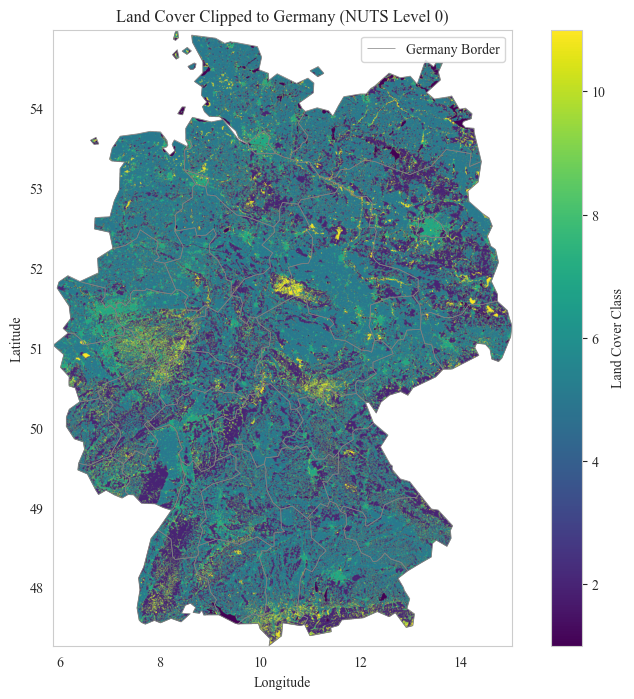

In [36]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
from rasterio.plot import show


# Load shapefile and filter Germany (NUTS Level 0)
shfl = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
gdf = gpd.read_file(shfl)
DE_gdf = gdf[(gdf.CNTR_CODE == 'DE') & (gdf.LEVL_CODE == 2)]

# Check CRS (should be EPSG:4326)
print(DE_gdf.crs)  # Should output: epsg:4326

# Path to merged mosaic (from previous step)
merged_tif = r"C:\Users\mun93\Downloads\Downsized_tif2\merged_mosaic.tif"

# Clip raster with Germany polygon
with rasterio.open(merged_tif) as src:
    # Ensure shapes are in the same CRS as the raster
    if DE_gdf.crs != src.crs:
        DE_gdf = DE_gdf.to_crs(src.crs)

    # Clip the raster
    out_image, out_transform = mask(
        src,
        DE_gdf.geometry,
        crop=True,
        nodata=src.nodata  # Preserve original NoData value
    )
    out_meta = src.meta.copy()

# Update metadata for the clipped raster
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Save clipped raster
clipped_output = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif"
with rasterio.open(clipped_output, "w", **out_meta) as dest:
    dest.write(out_image)

print(f"Clipped raster saved to: {clipped_output}")


# Plot clipped land cover
fig, ax = plt.subplots(figsize=(10, 8))

# Open clipped raster and plot
with rasterio.open(clipped_output) as src:
    rasterio.plot.show(src, ax=ax, cmap='viridis')  # Adjust colormap as needed

# Overlay Germany boundary
DE_gdf.boundary.plot(ax=ax, color='grey', linewidth=.5, label='Germany Border')

# Customize plot
plt.colorbar(ax.images[0], label='Land Cover Class')
plt.title('Land Cover Clipped to Germany (NUTS Level 0)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(False)
plt.show()

## LC for the report


In [37]:
import rasterio
import numpy as np

# Open the clipped TIFF
with rasterio.open(r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif") as src:
    data = src.read(1)  # Read the first band
    classes = np.unique(data)  # Get unique values

print("Land Cover Classes:", classes)
print(src.meta)

Land Cover Classes: [ 0  1  2  4  5  7  8  9 10 11]
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 3659, 'height': 3084, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 5.875170371590661,
       0.0, -0.0025000000000001245, 54.97862361017716)}


C:\Users\mun93\AppData\Local\Temp\ipykernel_23984\1655508129.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(classes))  # Use a distinct color map
C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


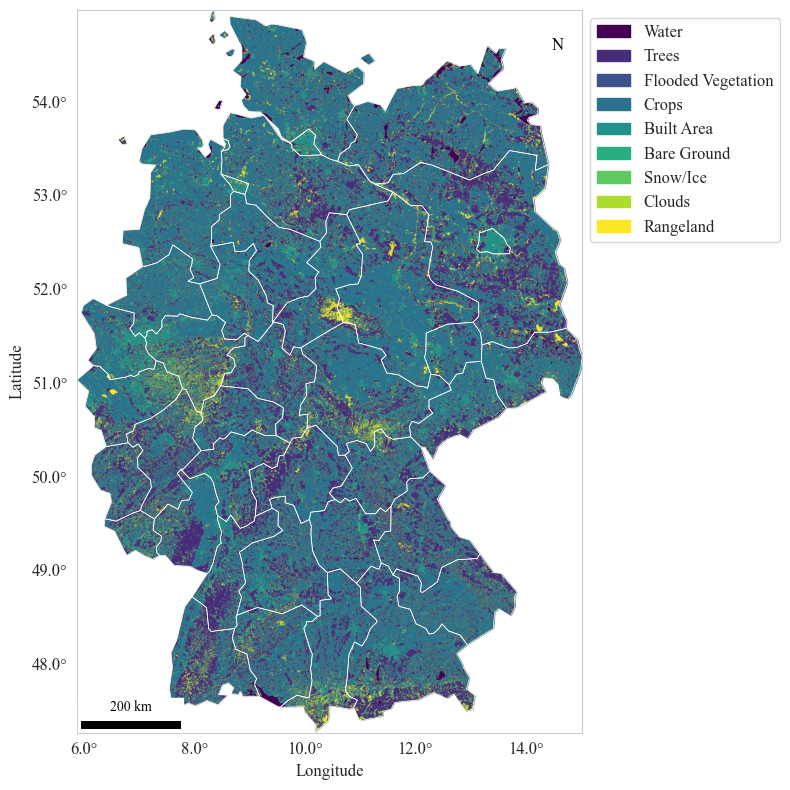

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import geopandas as gpd
from rasterio.mask import mask
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Set the font globally
plt.rcParams['font.family'] = 'Times New Roman'

# Load NUTS2 shapefile and filter for Germany
shfl = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
gdf = gpd.read_file(shfl)
de_boundaries = gdf[(gdf.CNTR_CODE == 'DE') & (gdf.LEVL_CODE == 2)]

# Open raster
raster_path = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif"
with rasterio.open(raster_path) as src:
    raster = src.read(1)
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
    nodata = src.nodata

    # Reproject the shapefile to match raster CRS
    de_boundaries = de_boundaries.to_crs(src.crs)

    # Clip raster to Germany boundary
    geometries = de_boundaries.geometry
    out_image, out_transform = mask(src, geometries, crop=True)
    out_image = np.ma.masked_equal(out_image, nodata)  # Mask NoData

# Step 1: Identify unique land use classes
classes = np.unique(out_image[0][~out_image[0].mask]).astype(int)

# Step 2: Map class codes to land use labels (adjust if needed)
land_use_labels = {
    0: "nodata",
    1: "Water",
    2: "Trees",
    #3: "Grass",
    4: "Flooded Vegetation",
    5: "Crops",
    #6: "Scrub/Shrub",
    7: "Built Area",
    8: "Bare Ground",
    9: "Snow/Ice",
    10: "Clouds",
    11: "Rangeland"
}
labels = [land_use_labels.get(c, f"Class {c}") for c in classes]

# Step 3: Create color map
cmap = cm.get_cmap('viridis', len(classes))  # Use a distinct color map
colors = [cmap(i) for i in range(len(classes))]
colormap = ListedColormap(colors)
norm = BoundaryNorm(classes.tolist() + [classes[-1] + 1], len(classes))

# Step 4: Plot the map
fig, ax = plt.subplots(figsize=(8, 8))

# Plot raster
img = ax.imshow(out_image[0], cmap=colormap, norm=norm, extent=extent)

# Plot boundaries
de_boundaries.boundary.plot(ax=ax, color='white', linewidth=0.5)

# Add legend
legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(classes))]


# Add scalebar
scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top')
ax.add_artist(scalebar)

# Add north arrow
ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize=12, ha='center', va='center', color='black')

# Format axes
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.set_aspect('auto')
ax.tick_params(labelsize=12)
ax.legend(handles=legend_patches, loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

plt.grid(False)
plt.tight_layout()
plt.show()


## zonal statistics

C:\Users\mun93\AppData\Local\Temp\ipykernel_10004\1109485591.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(class_labels))


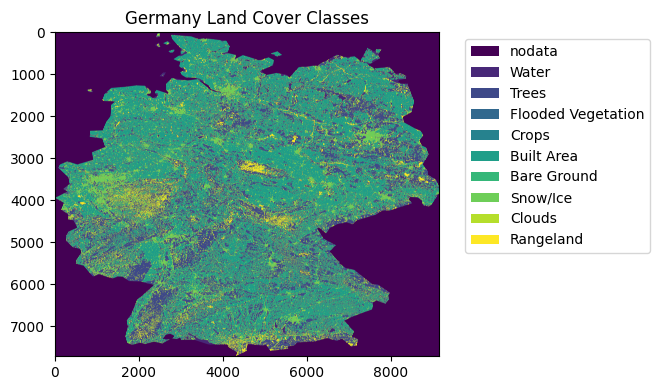

In [131]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# Define class labels (adjust based on your dataset)
class_labels = {
    0: "nodata",
    1: "Water",
    2: "Trees",
    #3: "Grass",
    4: "Flooded Vegetation",
    5: "Crops",
    #6: "Scrub/Shrub",
    7: "Built Area",
    8: "Bare Ground",
    9: "Snow/Ice",
    10: "Clouds",
    11: "Rangeland"
}

# Create a discrete colormap
cmap = plt.cm.get_cmap('viridis', len(class_labels))
norm = mcolors.BoundaryNorm(np.arange(len(class_labels)+1), cmap.N)

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
img = ax.imshow(data, cmap=cmap, norm=norm)

# Add legend
legend_elements = [Patch(facecolor=cmap(i), label=class_labels[cls])
                   for i, cls in enumerate(class_labels)]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Germany Land Cover Classes")
plt.grid(False)
plt.tight_layout()
plt.show()

## showing LC per layer

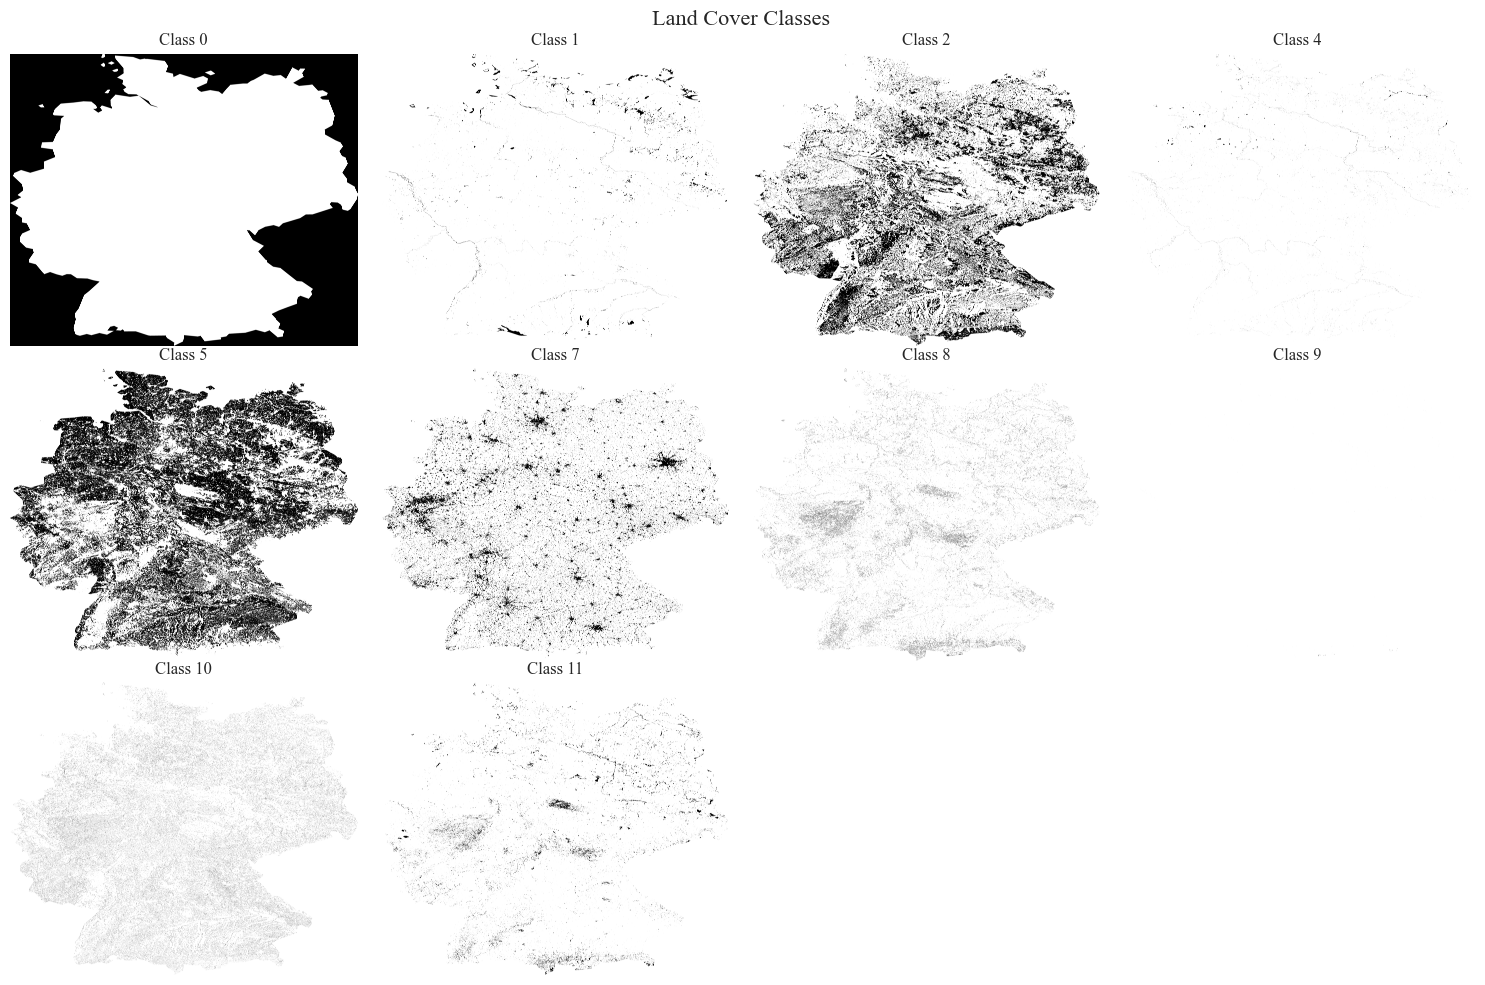

In [77]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster
file_path = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif"
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    classes = np.unique(raster_data)  # Get unique class values

# Determine grid layout (adjust as needed)
n_classes = len(classes)
n_cols = 4  # Number of columns in the subplot grid
n_rows = int(np.ceil(n_classes / n_cols))  # Calculate required rows

# Create a single figure with subplots for all classes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.suptitle('Land Cover Classes', fontsize=16)

# Flatten axes if needed (for 1D indexing)
if n_rows > 1:
    axes = axes.flatten()

# Plot each class
for i, class_val in enumerate(classes):
    mask = raster_data == class_val
    axes[i].imshow(mask, cmap='binary')
    axes[i].set_title(f'Class {class_val}')
    axes[i].axis('off')  # Hide axes for clarity

# Hide unused subplots (if any)
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Combining LC & WP

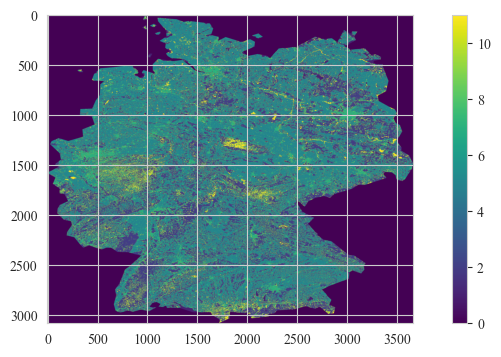

In [19]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np

# Define file paths
LC_tif = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_clipped.tif"
PD_tif = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
output_lc_aligned = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_aligned_to_PD.tif"

# Open the power density raster (reference raster)
with rasterio.open(PD_tif) as pd_src:
    pd_crs = pd_src.crs
    pd_transform = pd_src.transform
    pd_width = pd_src.width
    pd_height = pd_src.height
    pd_profile = pd_src.profile

# Open the land cover raster (source raster)
with rasterio.open(LC_tif) as lc_src:
    lc_data = lc_src.read(1)
    lc_crs = lc_src.crs
    lc_transform = lc_src.transform
    lc_dtype = lc_src.dtypes[0]
    lc_nodata = lc_src.nodata if lc_src.nodata is not None else 0

# Prepare the destination array
destination = np.full((pd_height, pd_width), lc_nodata, dtype=lc_dtype)

# Reproject and resample the land cover data
reproject(
    source=lc_data,
    destination=destination,
    src_transform=lc_transform,
    src_crs=lc_crs,
    dst_transform=pd_transform,
    dst_crs=pd_crs,
    resampling=Resampling.nearest,
    src_nodata=lc_nodata,
    dst_nodata=lc_nodata
)

# Update the profile for the output raster
output_profile = pd_profile.copy()
output_profile.update({
    'dtype': lc_dtype,
    'count': 1,
    'nodata': lc_nodata,
    'compress': 'lzw'
})


# Plot the reprojected wind power data
plt.figure(figsize=(10, 4))
plt.imshow(destination, cmap='viridis')  # Or 'plasma', 'inferno' for power density
cbar = plt.colorbar()

# # Save the reprojected land cover raster
with rasterio.open(output_lc_aligned, 'w', **output_profile) as dst:
     dst.write(destination, 1)


In [39]:
import rasterio
import numpy as np

# Open the TIFF file
file_path = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_aligned_to_PD.tif"
with rasterio.open(file_path) as src:
    landcover = src.read(1)  # Read the first band
    print(src.profile)
    print(src.crs)
    print(src.tags())
    landcover = landcover.astype(float)
    landcover[landcover == 0] = np.nan
    landcover = landcover.flatten()
    # Flatten to 1D array
    landcover = landcover[~np.isnan(landcover)]  # Remove NaN values (if any)

# Count unique class values and their frequencies
unique_classes, counts = np.unique(landcover, return_counts=True)

# Calculate percentages
total_pixels = landcover.size
percentages = (counts / total_pixels) * 100

# Print results
for class_val, percent in zip(unique_classes, percentages):
    print(f"Class {class_val}: {percent:.2f}%")

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 3659, 'height': 3081, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 5.876572682193888,
       0.0, -0.002500000000000124, 54.97826874773588), 'blockxsize': 3659, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
EPSG:4326
{'AREA_OR_POINT': 'Area'}
Class 1.0: 1.45%
Class 2.0: 28.23%
Class 4.0: 0.39%
Class 5.0: 48.49%
Class 7.0: 9.44%
Class 8.0: 3.66%
Class 9.0: 0.00%
Class 10.0: 5.59%
Class 11.0: 2.75%


In [24]:

with rasterio.open(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif") as pdens:
    print(pdens.profile)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 3659, 'height': 3081, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 5.876572682193888,
       0.0, -0.002500000000000124, 54.97826874773588), 'blockxsize': 3659, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


## calculating the theoretical potentials (only PD) without LC

In [40]:
import numpy as np
import rasterio
from geopy.distance import geodesic
import math

# Constants
BETZ_LIMIT = 0.593  # Maximum theoretical efficiency
TURBINE_EFFICIENCY = 0.40 * 0.85 # Real-world turbine efficiency (35-45%), including BETZ_LIMIT
TURBINE_SPACING = 800  # meters between turbines (industry standard)
ROTOR_DIAMETER = 150  # meters (typical modern turbine)
ROTOR_AREA = math.pi * (ROTOR_DIAMETER/2)**2  # 17,671 m²

GERMANY_AREA_KM2 = 356888.69  # Total area of Germany
CAPACITY_FACTOR = 0.267     # 25% capacity factor for German onshore wind
HOURS_PER_YEAR = 8760

def calculate_wind_potential(raster_path):
    """Calculate realistic wind power potential from power density raster."""

    # 1. Load raster data
    with rasterio.open(raster_path) as src:
        power_density = src.read(1)  # Wind power density in W/m²
        crs = src.crs
        transform = src.transform
        nodata = src.nodata

    # 2. Calculate pixel area in m²
    if crs.is_projected:
        # Projected CRS (units in meters)
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        # Geographic CRS (WGS84 in degrees)
        left, top = transform * (0, 0)
        right, _ = transform * (1, 0)
        _, bottom = transform * (0, 1)
        # Geodesic distances
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # 3. Mask NoData values
    valid_data = np.where(power_density == nodata, np.nan, power_density) if nodata is not None else power_density

    # 4. Apply turbine physics
    # a) Account for Betz limit and turbine efficiency
    extractable_density = valid_data * TURBINE_EFFICIENCY

    # b) Account for turbine spacing (only ~7% of area has turbines)
    turbine_area_per_pixel = TURBINE_SPACING**2  # 250,000 m² per turbine
    area_utilization = ROTOR_AREA / turbine_area_per_pixel  # ~0.07

    # c) Calculate actual power generation per pixel
    operational_power = extractable_density * area_utilization

    # 5. Calculate total power (W)
    total_power_W = np.nansum(operational_power * pixel_area_m2)
    total_power_GW = total_power_W / 1e9  # Convert to GW
    potential_installed_capacity = total_power_GW/CAPACITY_FACTOR

    # 6. Calculate annual energy (TWh)
    annual_energy_TWh = (potential_installed_capacity * CAPACITY_FACTOR * HOURS_PER_YEAR) / 1e3

    # 7. Calculate suitable area
    valid_pixels = np.count_nonzero(~np.isnan(valid_data) & (valid_data != 0))
    suitable_area_km2 = (valid_pixels * pixel_area_m2) / 1e6

    # 8. Print results with reality checks
    print("\n=== Results ===")
    print(f"Suitable area: {suitable_area_km2:,.0f} km² ({suitable_area_km2/GERMANY_AREA_KM2:.1%} of Germany)")
    print(f"Total installed capacity: {total_power_GW:,.0f} GW")
    print(f"Total potential installed capacity per year: {potential_installed_capacity:,.0f} GW")
    print(f"Annual energy potential: {annual_energy_TWh:,.0f} TWh/year (at {CAPACITY_FACTOR:.0%} CF)")

    # Compare to known values
    print("\n=== Validation ===")
    print(f"Fraunhofer IEE Estimate: 1,100-2,900 TWh/year")
    print(f"German Consumption (2023): ~500 TWh/year")

    print("\n valid_pixels",valid_pixels)

    return {
        'valid_pixels': valid_pixels,
        'suitable_area_km2': suitable_area_km2,
        'total_power_GW': total_power_GW,
        'potential_installed_capacity_GW': potential_installed_capacity,
        'annual_energy_TWh': annual_energy_TWh
    }

# Run calculation
results = calculate_wind_potential(r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif")

Pixel size: ~160.1m x ~278.3m (geographic)

=== Results ===
Suitable area: 325,507 km² (91.2% of Germany)
Total installed capacity: 1,109 GW
Total potential installed capacity per year: 4,155 GW
Annual energy potential: 9,719 TWh/year (at 27% CF)

=== Validation ===
Fraunhofer IEE Estimate: 1,100-2,900 TWh/year
German Consumption (2023): ~500 TWh/year

 valid_pixels 7306693


In [41]:
from scipy.ndimage import distance_transform_edt
from geopy.distance import geodesic
import rasterio


with rasterio.open(r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_aligned_to_PD.tif") as land_cover_crs:
    # Read the data
    lc_data = land_cover_crs.read(1)

    crs = land_cover_crs.crs
    #crs = crs.to_crs('EPSG:3035')
    transform = land_cover_crs.transform
    nodata = land_cover_crs.nodata

    if crs.is_projected:
        # Projected CRS (units in meters)
        pixel_width_m = abs(transform.a)
        pixel_height_m = abs(transform.e)
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: {pixel_width_m:.1f}m x {pixel_height_m:.1f}m")
    else:
        # Geographic CRS (WGS84 in degrees)
        left, top = transform * (0, 0)
        right, _ = transform * (1, 0)
        _, bottom = transform * (0, 1)
        # Geodesic distances
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # Create urban mask (class 7)
    valid_pixels = (lc_data != 99999999999)
    urban_mask = (lc_data == 7) & valid_pixels
    print(f"\ntotal pixles : {lc_data[lc_data!=0].size}")

    # Calculate Euclidean distance from urban areas
    # Using average pixel size if anisotropic
    avg_pixel_size = (pixel_width_m + pixel_height_m) / 2
    distance_from_urban  = distance_transform_edt(~urban_mask) * avg_pixel_size  # In meters

    keep_mask = (distance_from_urban > 1000) | urban_mask  # Also keeps urban cores
    # Alternative: EXCLUSION mask (pixels ≤1km from urban)
    exclude_mask = (distance_from_urban <= 1000)

    # Create buffer exclusion mask (1 km = 1000 m)
    residential_buffer_mask = (keep_mask) & valid_pixels  # True for pixels within 1km of urban areas
    true_count = np.sum(residential_buffer_mask)
    false_count = np.sum(~residential_buffer_mask)

    print(f"keep (true): {true_count}, exclude (false): {false_count}")
    nan_count = np.isnan(lc_data).sum()
    print(f"NaN pixels: {nan_count}")
    print(land_cover_crs.crs)

    # Alternative: If NoData is a specific value (e.g., -9999)
    print(f"\n", land_cover_crs.nodata)
    print(lc_data.size)
    nodata_value = land_cover_crs.nodata
    nodata_count = (lc_data == nodata_value).sum()
    print(f"NoData pixels: {nodata_count}")


Pixel size: ~160.1m x ~278.3m (geographic)

total pixles : 7332244
keep (true): 7177804, exclude (false): 4095575
NaN pixels: 0
EPSG:4326

 0.0
11273379
NoData pixels: 3941135


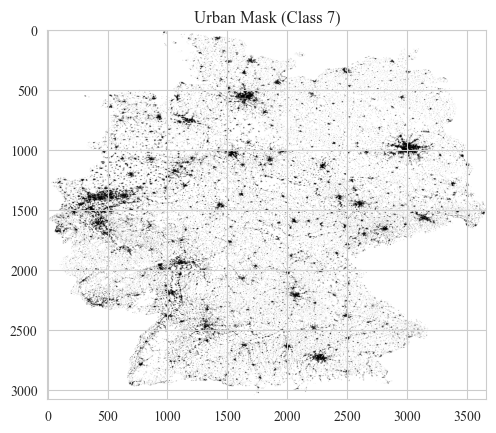

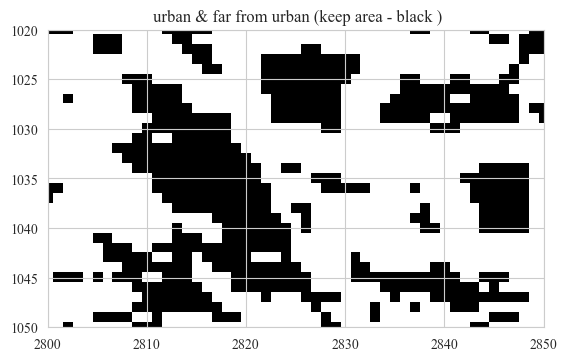

In [115]:
import matplotlib.pyplot as plt
plt.imshow(urban_mask, cmap='binary')  # Urban = white, Non-urban = black
plt.title("Urban Mask (Class 7)")
plt.show()

import matplotlib.pyplot as plt
plt.imshow(residential_buffer_mask, cmap='binary')
plt.title(" urban & far from urban (keep area - black )")
plt.xlim(2800, 2850)  # X-axis pixel range (left, right)
plt.ylim(1050, 1020,)
plt.show()

In [130]:
import numpy as np
import rasterio

# Define file paths
lc_aligned_path = r"C:\Users\mun93\Downloads\Downsized_tif2\DE_landcover_aligned_to_PD.tif"
wp_path = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
output_path = r"C:\Users\mun93\Downloads\wind_suitability_final.tif"

# Open rasters
with rasterio.open(lc_aligned_path) as lc_src, rasterio.open(wp_path) as pd_src:
    lc_data = lc_src.read(1)
    wp_data = pd_src.read(1)
    lc_nodata = lc_src.nodata if lc_src.nodata is not None else 0
    wp_nodata = pd_src.nodata if pd_src.nodata is not None else np.nan
    profile = pd_src.profile.copy()

# Create mask for invalid data
mask = (lc_data == lc_nodata) | (wp_data <= 0) | np.isnan(wp_data) #| ~residential_buffer_mask

# Apply mask
lc_masked = np.where(mask, np.nan, lc_data)
wp_masked = np.where(mask, np.nan, wp_data)

# Define weights for each land cover class
lc_weights = {
    1: 0.0,   # Water → Exclude
    2: 0.0,   # Trees → Keep top 20%

    4: 0.3,   # Flooded Vegetation → Exclude
    5: 0.2,   # Crops → Keep top 60%

    7: 0.0,   # Urban → Exclude
    8: 1.0,   # Bare Ground → Keep 100%
    9: 0.0,   # Snow/Ice → Exclude
    10: 0.0,  # Clouds → Exclude
    11: 1.0,  # Rangeland → Keep top 90%
}

# Initialize suitability array with NaNs
suitability = np.full_like(wp_masked, np.nan, dtype=np.float32)

# Process each land cover class
for class_id, weight in lc_weights.items():
    if weight == 0:
        continue  # Skip excluded classes

    class_mask = (lc_masked == class_id) & (~np.isnan(wp_masked))
    class_power = np.where(class_mask, wp_masked, np.nan)

    if weight == 1:
        suitability[class_mask] = wp_masked[class_mask]
    else:
        valid_power = class_power[~np.isnan(class_power)]
        if valid_power.size > 0:
            threshold = np.nanpercentile(valid_power, 100 * (1 - weight))
            top_pixels = class_mask & (wp_masked >= threshold)
            suitability[top_pixels] = wp_masked[top_pixels]

# Update profile for output raster
profile.update({
    'dtype': 'float32',
    'nodata': np.nan
})

# Save the suitability raster
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(suitability, 1)


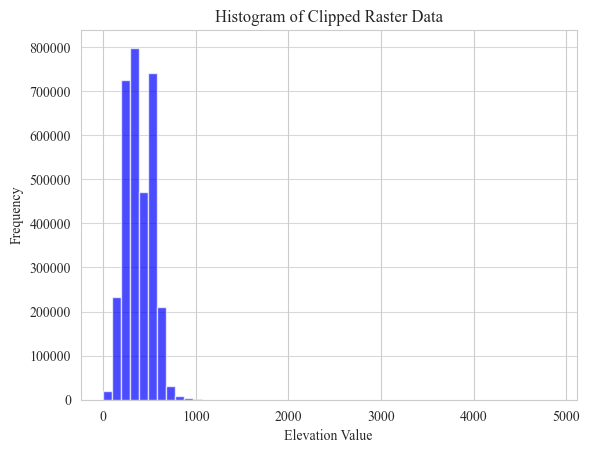

In [193]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Flatten the raster data to 1D
data = suitability.flatten()

# Remove NaN or NoData values (if any)
data = data[(~np.isnan(data)) & (data != src.nodata)]

# Plot the histogram using Matplotlib
plt.hist(data, bins=50, color='blue', alpha=0.7, #range=(0,240)
         )
plt.title("Histogram of Clipped Raster Data")
plt.xlabel("Elevation Value")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


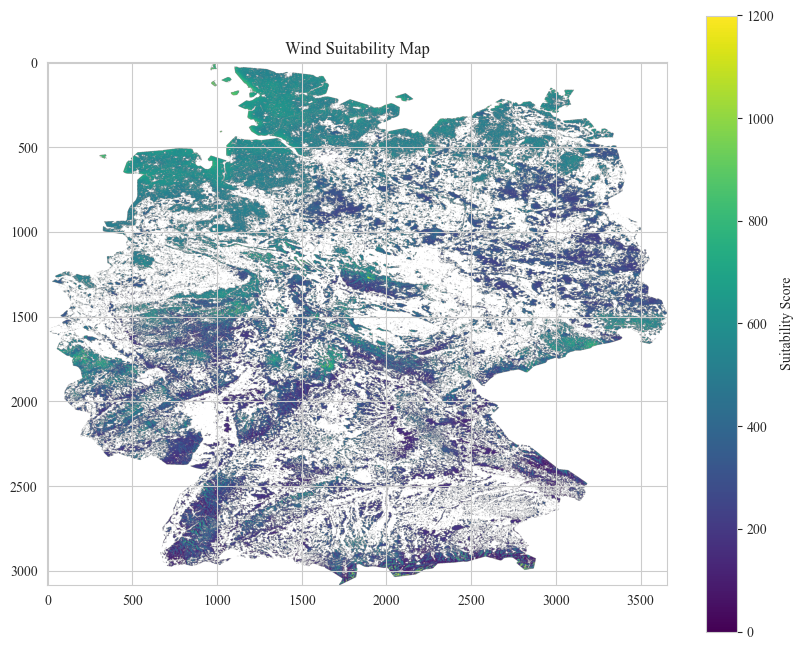

In [194]:
import numpy as np

with rasterio.open(output_path) as src:
    data = src.read(1)
    data = np.ma.masked_where(np.isnan(data), data)
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.imshow(data, cmap='viridis', vmin=0, vmax=1200)
    ax.set_title("Wind Suitability Map")
    fig.colorbar(cax, ax=ax, label='Suitability Score')
    plt.show()


## calculating the potentials after the LC

In [42]:
import numpy as np
import rasterio
from geopy.distance import geodesic
import math

# Constants
BETZ_LIMIT = 0.593  # Maximum theoretical efficiency
TURBINE_EFFICIENCY = 0.40 * 0.85 # Real-world turbine efficiency (35-45%), including BETZ_LIMIT
TURBINE_SPACING = 800  # meters between turbines (industry standard)
ROTOR_DIAMETER = 150  # meters (typical modern turbine)
ROTOR_AREA = math.pi * (ROTOR_DIAMETER/2)**2  # 17,671 m²

GERMANY_AREA_KM2 = 356888.69  # Total area of Germany
CAPACITY_FACTOR = 0.267     # 25% capacity factor for German onshore wind
HOURS_PER_YEAR = 8760

def calculate_wind_potential(raster_path):
    """Calculate realistic wind power potential from power density raster."""

    # 1. Load raster data
    with rasterio.open(raster_path) as src:
        power_density = src.read(1)  # Wind power density in W/m²
        crs = src.crs
        transform = src.transform
        nodata = src.nodata

    # 2. Calculate pixel area in m²
    if crs.is_projected:
        # Projected CRS (units in meters)
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        # Geographic CRS (WGS84 in degrees)
        left, top = transform * (0, 0)
        right, bottom = transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # 3. Mask NoData values
    valid_data = np.where(power_density == nodata, np.nan, power_density) if nodata is not None else power_density

    # 4. Apply turbine physics
    # a) Account for Betz limit and turbine efficiency
    extractable_density = valid_data * TURBINE_EFFICIENCY

    # b) Account for turbine spacing (only ~7% of area has turbines)
    turbine_area_per_pixel = TURBINE_SPACING**2  # 250,000 m² per turbine
    area_utilization = ROTOR_AREA / turbine_area_per_pixel  # ~0.07

    # c) Calculate actual power generation per pixel
    operational_power = extractable_density * area_utilization

    # 5. Calculate total power (W)
    total_power_W = np.nansum(operational_power * pixel_area_m2)
    total_power_GW = total_power_W / 1e9  # Convert to GW
    potential_installed_capacity = total_power_GW/CAPACITY_FACTOR

    # 6. Calculate annual energy (TWh)
    annual_energy_TWh = (potential_installed_capacity * CAPACITY_FACTOR * HOURS_PER_YEAR) / 1e3

    # 7. Calculate suitable area
    valid_pixels = np.count_nonzero(~np.isnan(valid_data) & (valid_data != 0))
    suitable_area_km2 = (valid_pixels * pixel_area_m2) / 1e6

    # 8. Print results with reality checks
    print("\n=== Results ===")
    print(f"Suitable area: {suitable_area_km2:,.0f} km² ({suitable_area_km2/GERMANY_AREA_KM2:.1%} of Germany)")
    print(f"Total installed capacity: {total_power_GW:,.0f} GW")
    print(f"Total potential installed capacity per year: {potential_installed_capacity:,.0f} GW")
    print(f"Annual energy potential: {annual_energy_TWh:,.0f} TWh/year (at {CAPACITY_FACTOR:.0%} CF)")

    # Compare to known values
    print("\n=== Validation ===")
    print(f"Fraunhofer IEE Estimate: 1,100-2,900 TWh/year")
    print(f"German Consumption (2023): ~500 TWh/year")

    return {
        'suitable_area_km2': suitable_area_km2,
        'total_power_GW': total_power_GW,
        'potential_installed_capacity_GW': potential_installed_capacity,
        'annual_energy_TWh': annual_energy_TWh
    }

# Run calculation
results = calculate_wind_potential(r"C:\Users\mun93\Downloads\wind_suitability_final.tif")

Pixel size: ~160.1m x ~278.3m (geographic)

=== Results ===
Suitable area: 52,757 km² (14.8% of Germany)
Total installed capacity: 235 GW
Total potential installed capacity per year: 880 GW
Annual energy potential: 2,059 TWh/year (at 27% CF)

=== Validation ===
Fraunhofer IEE Estimate: 1,100-2,900 TWh/year
German Consumption (2023): ~500 TWh/year


In [13]:
pip install rasterstats

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.5 MB 23.5 MB/s eta 0:00:01
   --- ------------------------------------ 2.1/24.5 MB 23.5 MB/s eta 0:00:01
   --- ------------------------------------ 2.1/24.5 MB 23.5 MB/s eta 0:00:01
   ------ --------------------------------- 4.2/24.5 MB 4.8 MB/s eta 0:00:05
   --------- ------------------------------ 5.8/24.5 MB 5.3 MB/s eta 0:00:04
   ------------------- -------------------- 12.1/24.5 MB 9.4 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.5 MB 10.3 MB/s et

## first total theoretical potential map

In [50]:
import rasterio
import geopandas as gpd
import numpy as np
import math
import pandas as pd
from rasterio.mask import mask
from geopy.distance import geodesic

# --- Constants ---
BETZ_LIMIT = 0.593
TURBINE_EFFICIENCY = 0.40 * 0.85  # Betz + mechanical losses (~34%)
TURBINE_SPACING = 800  # meters between turbines
ROTOR_DIAMETER = 150  # meters
ROTOR_AREA = math.pi * (ROTOR_DIAMETER / 2)**2  # m² (≈17,671 m²)
HOURS_PER_YEAR = 8760

# --- Load NUTS-2 regions for Germany ---
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]
gdf = DE.copy()

# --- Load raster ---
#raster_path = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
raster_path = r"C:\Users\mun93\Downloads\wind_suitability_final.tif"

with rasterio.open(raster_path) as src:
    crs = src.crs
    transform = src.transform
    nodata = src.nodata

    # Reproject shapefile to match raster CRS
    gdf = gdf.to_crs(crs)

    # Determine pixel area
    if crs.is_projected:
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        left, top = transform * (0, 0)
        right, bottom = transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # --- Process each region ---
    results = []
    for idx, row in gdf.iterrows():
        geom = [row.geometry.__geo_interface__]

        try:
            out_image, _ = mask(src, geom, crop=True, nodata=nodata, filled=True)
            valid_data = out_image[0]

            # Mask nodata
            if nodata is not None:
                valid_data = np.where(valid_data == nodata, np.nan, valid_data)

            # 1. Apply turbine physics
            extractable_density = valid_data * TURBINE_EFFICIENCY  # W/m²
            area_utilization = ROTOR_AREA / TURBINE_SPACING**2     # Area fraction
            operational_power = extractable_density * area_utilization  # W/m²

            # 2. Total power and energy
            total_power_W = np.nansum(operational_power * pixel_area_m2)
            total_energy_TWh = total_power_W * HOURS_PER_YEAR / 1e12  # TWh/year

            # 3. Green hydrogen estimation
            total_H2_Mt = total_energy_TWh * 0.70 / 39.39  # Assume 70% efficiency, 39.39 TWh/Mt H₂

            results.append({
                "NUTS_ID": row.NUTS_ID,
                "Region_Name": row.NUTS_NAME,
                "Total_Power_TWh": round(total_energy_TWh, 1),
                "Total_H2_Mt": round(total_H2_Mt, 2)
            })

        except Exception as e:
            print(f"Error processing {row.NUTS_ID}: {e}")
            results.append({
                "NUTS_ID": row.NUTS_ID,
                "Region_Name": row.NUTS_NAME,
                "Total_Power_TWh": 0,
                "Total_H2_Mt": 0
            })

# --- Export results ---
df_after = pd.DataFrame(results)
print(df_after)

# Optionally save:
# df.to_csv("wind_power_twh_by_nuts2.csv", index=False)


Pixel size: ~160.1m x ~278.3m (geographic)
   NUTS_ID             Region_Name  Total_Power_TWh  Total_H2_Mt
0     DE11               Stuttgart         9.500000         0.17
1     DE12               Karlsruhe         5.100000         0.09
2     DE13                Freiburg        16.400000         0.29
3     DE14                Tübingen        12.900000         0.23
4     DE21              Oberbayern        28.900000         0.51
5     DE22            Niederbayern         4.000000         0.07
6     DE23               Oberpfalz         5.700000         0.10
7     DE24             Oberfranken         7.800000         0.14
8     DE25           Mittelfranken         3.200000         0.06
9     DE26            Unterfranken         8.500000         0.15
10    DE27                Schwaben        24.500000         0.43
11    DE30                  Berlin         0.600000         0.01
12    DE40             Brandenburg        67.300003         1.20
13    DE50                  Bremen         3.70

In [44]:
print(df.Total_Power_TWh.sum())

2058.9


## map before land cover

In [104]:
import rasterio
import geopandas as gpd
import numpy as np
import math
import pandas as pd
from rasterio.mask import mask
from geopy.distance import geodesic

# --- Constants ---
BETZ_LIMIT = 0.593
TURBINE_EFFICIENCY = 0.40 * 0.85  # Betz + mechanical losses (~34%)
TURBINE_SPACING = 800  # meters between turbines
ROTOR_DIAMETER = 150  # meters
ROTOR_AREA = math.pi * (ROTOR_DIAMETER / 2)**2  # m² (≈17,671 m²)
HOURS_PER_YEAR = 8760

# --- Load NUTS-2 regions for Germany ---
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]
gdf = DE.copy()

# --- Load raster ---
#raster_path = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
raster_path =  r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
               #r"C:\Users\mun93\Downloads\wind_suitability_final.tif"

with rasterio.open(raster_path) as src:
    crs = src.crs
    transform = src.transform
    nodata = src.nodata

    # Reproject shapefile to match raster CRS
    gdf = gdf.to_crs(crs)

    # Determine pixel area
    if crs.is_projected:
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        left, top = transform * (0, 0)
        right, bottom = transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # --- Process each region ---
    results = []
    for idx, row in gdf.iterrows():
        geom = [row.geometry.__geo_interface__]

        try:
            out_image, _ = mask(src, geom, crop=True, nodata=nodata, filled=True)
            valid_data = out_image[0]

            # Mask nodata
            if nodata is not None:
                valid_data = np.where(valid_data == nodata, np.nan, valid_data)

            # 1. Apply turbine physics
            extractable_density = valid_data * TURBINE_EFFICIENCY  # W/m²
            area_utilization = ROTOR_AREA / TURBINE_SPACING**2     # Area fraction
            operational_power = extractable_density * area_utilization  # W/m²

            # 2. Total power and energy
            total_power_W = np.nansum(operational_power * pixel_area_m2)
            total_energy_TWh = total_power_W * HOURS_PER_YEAR / 1e12  # TWh/year

            # 3. Green hydrogen estimation
            total_H2_Mt = total_energy_TWh * 0.70 / 39.39  # Assume 70% efficiency, 39.39 TWh/Mt H₂

            results.append({
                "NUTS_ID": row.NUTS_ID,
                "Region_Name": row.NUTS_NAME,
                "Total_Power_TWh": round(total_energy_TWh, 1),
                "Total_H2_Mt": round(total_H2_Mt, 2)
            })

        except Exception as e:
            print(f"Error processing {row.NUTS_ID}: {e}")
            results.append({
                "NUTS_ID": row.NUTS_ID,
                "Region_Name": row.NUTS_NAME,
                "Total_Power_TWh": 0,
                "Total_H2_Mt": 0
            })

# --- Export results ---
df_before = pd.DataFrame(results).sort_values("Total_Power_TWh")
print(df_before)

# Optionally save:
# df.to_csv("wind_power_twh_by_nuts2.csv", index=False)


Pixel size: ~160.1m x ~278.3m (geographic)
   NUTS_ID             Region_Name  Total_Power_TWh  Total_H2_Mt
13    DE50                  Bremen        14.600000         0.26
11    DE30                  Berlin        17.000000         0.30
14    DE60                 Hamburg        24.600000         0.44
31    DEC0                Saarland        54.900002         0.98
34    DED5                 Leipzig       105.099998         1.87
16    DE72                  Gießen       120.199997         2.14
29    DEB2                   Trier       124.599998         2.21
1     DE12               Karlsruhe       137.000000         2.43
15    DE71               Darmstadt       143.600006         2.55
30    DEB3       Rheinhessen-Pfalz       145.399994         2.58
2     DE13                Freiburg       150.399994         2.67
8     DE25           Mittelfranken       151.899994         2.70
7     DE24             Oberfranken       152.699997         2.71
5     DE22            Niederbayern       155.00

In [120]:
df_before.Total_Power_TWh.sum()

np.float32(9719.3)

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


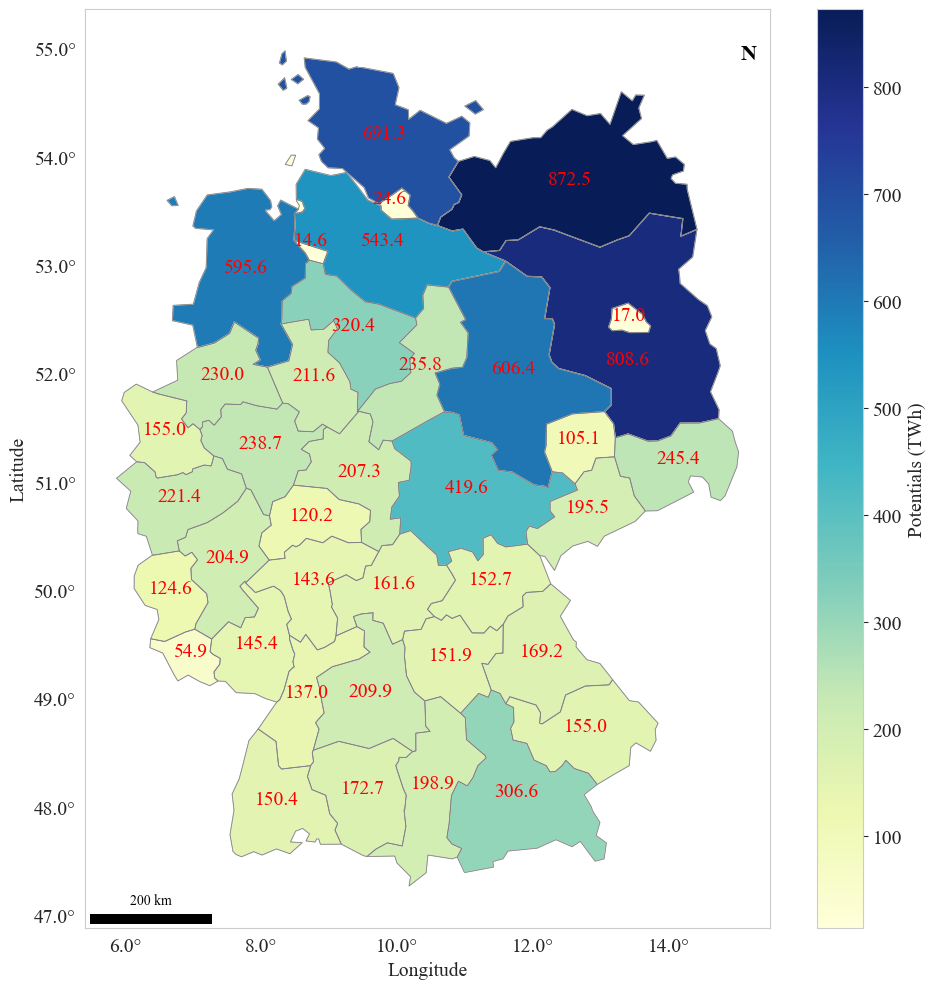

In [49]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame

# Load original NUTS-2 shapefile
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE2 = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]

# Load your computed data (df must already exist)
# df = pd.read_csv("wind_power_twh_by_nuts2.csv")  # optional if saved
merged = DE2.merge(df_before, on="NUTS_ID")

DE2_with_drop = merged.copy()


plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Total_Power_TWh",
                   cmap="YlGnBu",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",

                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Total_Power_TWh']:.1f}",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=14,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color="red"
    )
DE2.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=14)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=14)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='black', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)

# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Total_Power_TWh"].min(),
                        vmax=DE2_with_drop["Total_Power_TWh"].max())
cmap = plt.cm.YlGnBu

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Potentials (TWh)", fontsize=14)
cbar.ax.tick_params(labelsize=14)
ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()


## report map after land cover

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


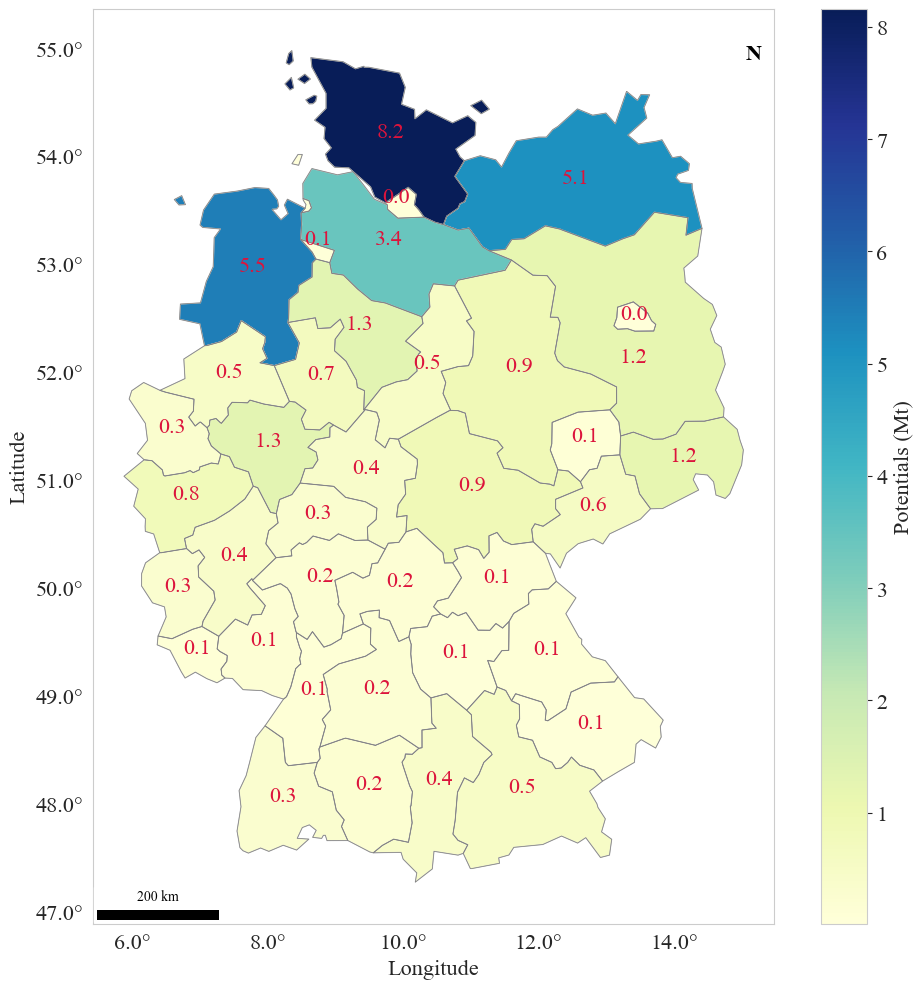

In [106]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame

# Load original NUTS-2 shapefile
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE2 = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]

# Load your computed data (df must already exist)
# df = pd.read_csv("wind_power_twh_by_nuts2.csv")  # optional if saved
merged = DE2.merge(df_after, on="NUTS_ID")

DE2_with_drop = merged.copy()


plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Total_H2_Mt",
                   cmap="YlGnBu",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",

                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Total_H2_Mt']:.1f}",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=16,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color="crimson"
    )
DE2.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='black', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)

# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Total_H2_Mt"].min(),
                        vmax=DE2_with_drop["Total_H2_Mt"].max())
cmap = plt.cm.YlGnBu

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Potentials (Mt)", fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()


## Hydrogen

In [ ]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame

# Load original NUTS-2 shapefile
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE2 = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]

# Load your computed data (df must already exist)
# df = pd.read_csv("wind_power_twh_by_nuts2.csv")  # optional if saved
merged = DE2.merge(df_after, on="NUTS_ID")

DE2_with_drop = merged.copy()


plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Total_Power_TWh",
                   cmap="YlGnBu",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",

                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Total_Power_TWh']:.1f}",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=16,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color="crimson"
    )
DE2.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='black', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)

# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Total_Power_TWh"].min(),
                        vmax=DE2_with_drop["Total_Power_TWh"].max())
cmap = plt.cm.YlGnBu

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Potentials (TWh)", fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
C:\Users\mun93\AppData\Local\Temp\ipykernel_23984\1756505318.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space on right for colorbar


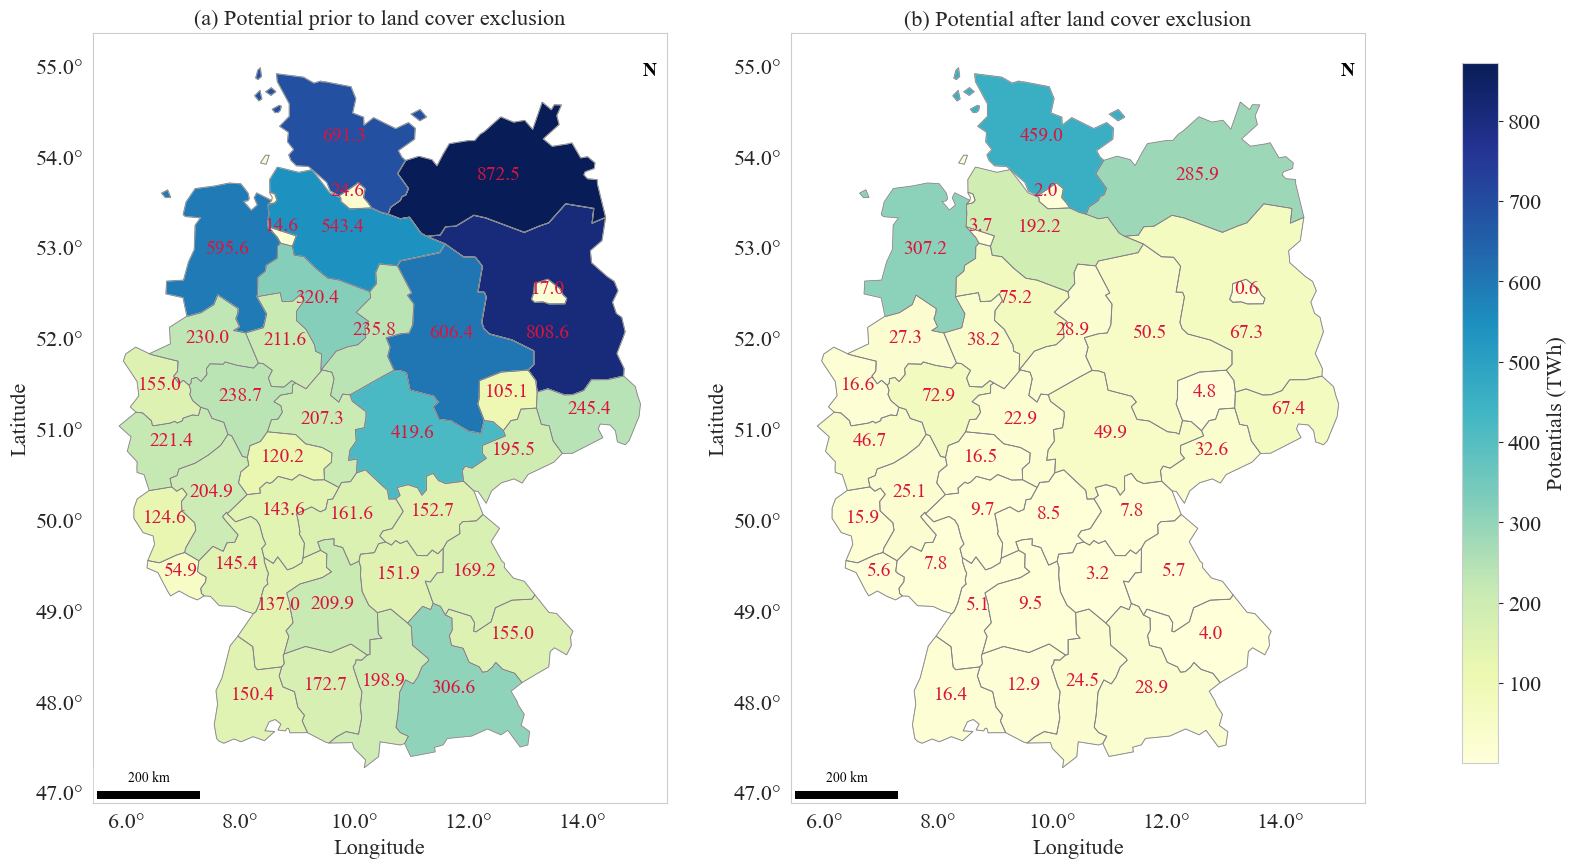

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors

# Load shapefile
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE2 = DE_shape_file[(DE_shape_file['NUTS_ID'].str.startswith('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]

# Merge data
merged_before = DE2.merge(df_before, on="NUTS_ID")
merged_after = DE2.merge(df_after, on="NUTS_ID")

# Consistent colormap and normalization
vmin = min(merged_before["Total_Power_TWh"].min(), merged_after["Total_Power_TWh"].min())
vmax = max(merged_before["Total_Power_TWh"].max(), merged_after["Total_Power_TWh"].max())
cmap = cm.YlGnBu
norm = colors.Normalize(vmin=vmin, vmax=vmax)

plt.rcParams['font.family'] = 'Times New Roman'

# Create figure with 2 subplots + colorbar axis
fig, axes = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.002})
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]

for ax, data, title in zip(
    axes,
    [merged_before, merged_after],
    ['(a) Potential prior to land cover exclusion', '(b) Potential after land cover exclusion']
):
    data.plot(
        column="Total_Power_TWh",
        cmap=cmap,
        linewidth=0.8,
        ax=ax,
        edgecolor="0.8",
        norm=norm
    )
    # Add annotations
    for _, row in data.iterrows():
        xytext = (0, -30) if row['NUTS_ID'] == 'DE40' else (0, 0)
        ax.annotate(
            text=f"{row['Total_Power_TWh']:.1f}",
            xy=row.geometry.centroid.coords[0],
            ha='center',
            fontsize=14,
            xytext=xytext,
            textcoords='offset points',
            color="crimson"
        )
    DE2.boundary.plot(ax=ax, color='grey', linewidth=0.5)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
    ax.tick_params(axis='both', labelsize=16)
    ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
                fontsize=14, ha='center', va='center', color='black', fontweight='bold')
    ax.add_artist(ScaleBar(111, "km", loc='lower left', scale_loc='top'))
    ax.set_axis_on()
    ax.grid(False)  # remove grid lines

# Shared colorbar on the far right
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Potentials (TWh)", fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space on right for colorbar
plt.show()


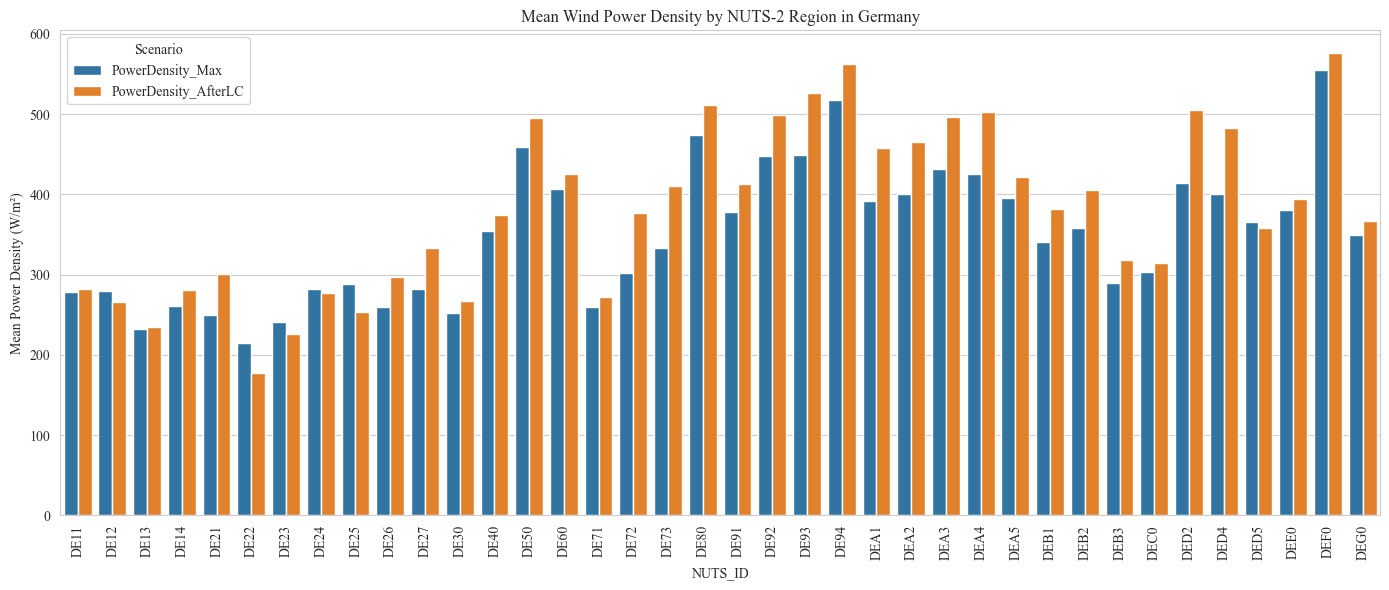

In [119]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

# Paths to input files
max_path = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
after_lc_path = r"C:\Users\mun93\Downloads\wind_suitability_final.tif"
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'

# Load shapefile and filter for Germany at NUTS level 2
DE_shape_file = gpd.read_file(shpfile)
DE2 = DE_shape_file[(DE_shape_file['NUTS_ID'].str.contains('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]

# Compute zonal statistics for each raster
zonal_max = zonal_stats(DE2, max_path, stats=["mean"], geojson_out=True)
zonal_after_lc = zonal_stats(DE2, after_lc_path, stats=["mean"], geojson_out=True)

# Extract NUTS_IDs and statistics
nuts_ids = [f["properties"]["NUTS_ID"] for f in zonal_max]
max_values = [f["properties"]["mean"] for f in zonal_max]
after_lc_values = [f["properties"]["mean"] for f in zonal_after_lc]

# Create DataFrame
df = pd.DataFrame({
    "NUTS_ID": nuts_ids,
    "PowerDensity_Max": max_values,
    "PowerDensity_AfterLC": after_lc_values
})

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars="NUTS_ID", value_vars=["PowerDensity_Max", "PowerDensity_AfterLC"],
                    var_name="Scenario", value_name="Mean Power Density (W/m²)")

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="NUTS_ID", y="Mean Power Density (W/m²)", hue="Scenario")
plt.xticks(rotation=90)
plt.title("Mean Wind Power Density by NUTS-2 Region in Germany")
plt.tight_layout()
plt.show()


C:\Users\mun93\AppData\Local\Temp\ipykernel_23984\3128596132.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Percent Drop", y="NUTS_ID", palette="Reds_d")


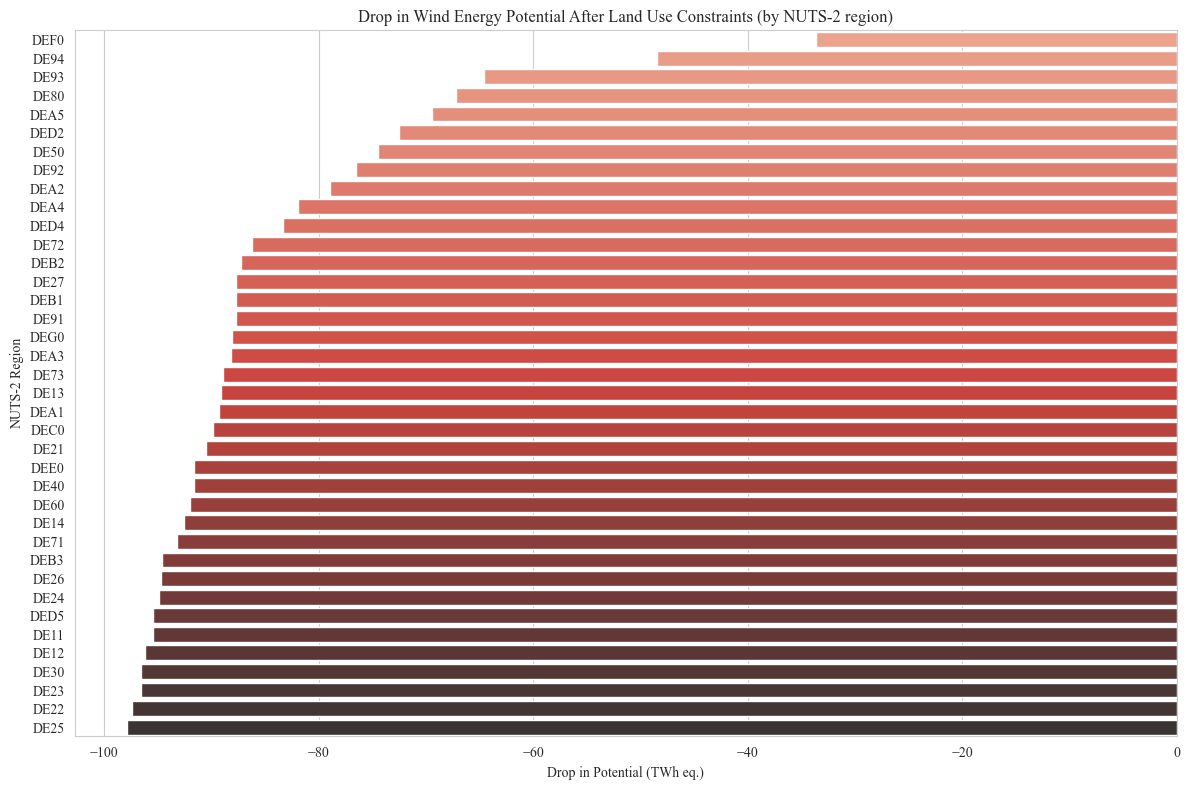

In [127]:
import geopandas as gpd
import rasterio
import rasterstats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input files
max_potential_raster = r"C:\Users\mun93\Downloads\Power_density\DE_power_density_clipped.tif"
post_constraint_raster = r"C:\Users\mun93\Downloads\wind_suitability_final.tif"
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'

# Load NUTS-2 shapefile
DE_shape = gpd.read_file(shpfile)
DE2 = DE_shape[(DE_shape['NUTS_ID'].str.startswith('DE')) & (DE_shape['LEVL_CODE'] == 2)]

# Calculate zonal stats (sum of pixel values) for each raster
stats_max = rasterstats.zonal_stats(DE2, max_potential_raster, stats="sum", geojson_out=True)
stats_after = rasterstats.zonal_stats(DE2, post_constraint_raster, stats="sum", geojson_out=True)

# Convert to DataFrame
data = []
for s_max, s_after in zip(stats_max, stats_after):
    nuts_id = s_max['properties']['NUTS_ID']
    region_name = s_max['properties'].get('NAME_LATN', nuts_id)
    val_max = s_max['properties']['sum']
    val_after = s_after['properties']['sum']
    drop = (val_after - val_max)
    pct_drop = (val_after/val_max -1) * 100  if val_max else 0

    data.append({
        "NUTS_ID": nuts_id,
        "Region": region_name,
        "Before (TWh eq.)": val_max,
        "After (TWh eq.)": val_after,
        "Drop (TWh eq.)": drop,
        "Percent Drop": pct_drop
    })

df = pd.DataFrame(data)
df_sorted = df.sort_values(by="Percent Drop", ascending=False)

# Plot: Top impacted zones
plt.figure(figsize=(12, 8))
sns.barplot(data=df_sorted, x="Percent Drop", y="NUTS_ID", palette="Reds_d")
plt.title("Drop in Wind Energy Potential After Land Use Constraints (by NUTS-2 region)")
plt.xlabel("Drop in Potential (TWh eq.)")
plt.ylabel("NUTS-2 Region")
plt.tight_layout()
plt.show()


C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


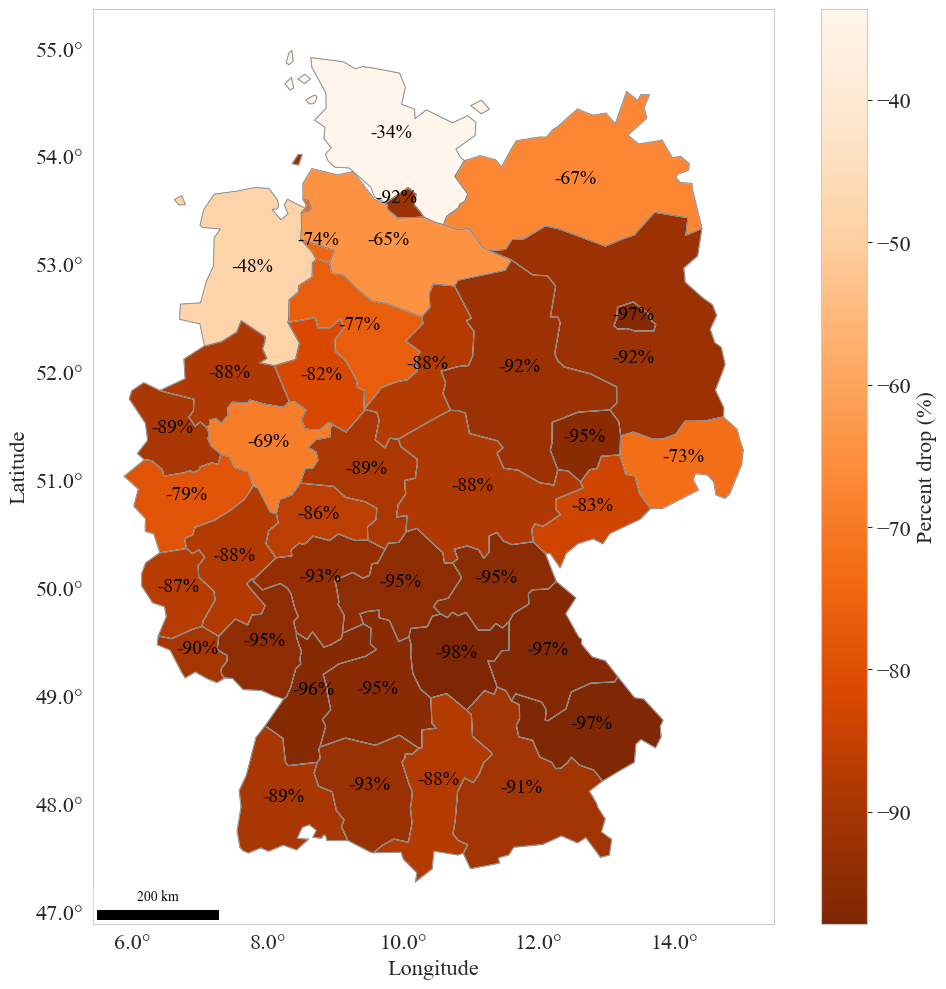

In [129]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame
DE2_with_drop = DE2.merge(df[["NUTS_ID", "Percent Drop"]], on="NUTS_ID")
DE2_with_drop['Percent Drop'] = DE2_with_drop['Percent Drop'].round(2)

plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Percent Drop",
                   cmap="Oranges_r",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",
                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Percent Drop']:.0f}%",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=14,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color='black',
    )
DE2.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='white', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)

# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Percent Drop"].min(),
                        vmax=DE2_with_drop["Percent Drop"].max())
cmap = plt.cm.Oranges_r

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Percent drop (%)", fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()


In [124]:
print(DE2_with_drop[['NUTS_ID', 'NAME_LATN','Percent Drop']])

   NUTS_ID               NAME_LATN  Percent Drop
0     DE11               Stuttgart        -95.48
1     DE12               Karlsruhe        -96.25
2     DE13                Freiburg        -89.09
3     DE14                Tübingen        -92.55
4     DE21              Oberbayern        -90.56
5     DE22            Niederbayern        -97.40
6     DE23               Oberpfalz        -96.61
7     DE24             Oberfranken        -94.88
8     DE25           Mittelfranken        -97.87
9     DE26            Unterfranken        -94.72
10    DE27                Schwaben        -87.69
11    DE30                  Berlin        -96.58
12    DE40             Brandenburg        -91.68
13    DE50                  Bremen        -74.46
14    DE60                 Hamburg        -91.97
15    DE71               Darmstadt        -93.24
16    DE72                  Gießen        -86.25
17    DE73                  Kassel        -88.97
18    DE80  Mecklenburg-Vorpommern        -67.23
19    DE91          